# <h1><center>Airbnb NYC Listing Price Predictor

![Satellite_Image of New York City](img/nasa-_SFJhRPzJHs-unsplash.jpg)

## <h2><center>Introduction

The dataset we will be analyzing consists of scraped Airbnb NYC data of all live listings from June 6-7, 2019. The original dataset consists of 256 individual features, consisting of host details, listing location, past rental details, guest reviews, and property amenities.

This project is intended to provide Airbnb with business intelligence, along with showcasing the process of cleaning, exploring, analyzing, and modeling a company dataset using Python, NumPy, Pandas, Scikit-Learn, and other essential data science libraries and techniques.

The independent variable of this data is price, which is the price per listing per night.

The data has been retrieved from an Airbnb web-scraping website called insideairbnb.com.

## <h2><center>Goals of the Project

The first goal of this project is to create a machine learning model that can predict the price of a standard Airbnb in New York City based on the listing's features and amenities in the dataset (ie # bedrooms, TV, WiFi, etc).

In addition to our price predictor, our second goal is to analyze the listings data using exploratory data analysis to pull insights that will help Airbnb to raise revenues and increase efficiency. We will do so by answering the following 3 questions:

**1. Which hosts generate the most revenue?**


**2. Which locations generate the most revenue?**


**3. Do listings with higher ratings generate more revenue?**

In order to improve prediction accuracy and limit our data to more standard Airbnb listings, we will remove outlier data from extremely luxurious listings that are astronomically more expensive than more standard Airbnb's. The maximum price/night we will use is the tukey outlier threshold of $323 as we will see below.

*Please note that some cells in the feature-cleaning stage have been hidden in order to simplify this notebook and aid in readability.*

# Importing the Data

In [1]:
# Common imports
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
import pprint
import missingno
import thinkstats2
import thinkplot
import scipy
from numpy import median

# For viewing this notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:55% !important; }</style>"))
from IPython.display import HTML

# Timing models
import math, time, datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=18)
#mpl.rc('xtick', labelsize=16)
#mpl.rc('ytick', labelsize=16)
import seaborn as sns

# Warnings
import warnings
# to change warnings in functions:
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"
# to reset warnings:
#warnings.resetwarnings()

# Where to save the figures
PROJECT_ROOT_DIR = '/Users/Gregs_Computer/Documents/Studies/Data_Science/Projects/Airbnb_NYC/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'Images')
os.makedirs(IMAGES_PATH, exist_ok=True)

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, 'images', fig_id)

def save_fig(fig_id, tight_layout=True):
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + '.png', format='png', dpi=300)

Data retrieved from: http://insideairbnb.com/get-the-data.html.

Here we view the first 5 rows of the DataFrame to get an idea of the data's layout and features.

In [2]:
# Import Listings Data
listings_original = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, 'Data', 'listings.csv'))
listings_original.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190602163209,2019-06-03,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,6.0,6.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Brooklyn,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.64749,-73.97237,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,$149.00,$299.00,$999.00,$100.00,$25.00,1,$35.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,30,60,90,365,2019-06-03,9,2,2015-12-04,2018-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190602163209,2019-06-03,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,83%,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New York, NY, United States",Ma

In [3]:
# Shape of original data
listings_original.shape

(48801, 106)

# Cleaning the Data

We will begin by splitting the data into train and test sets. We will only be observing the training set to avoid any bias from assumptions made based on the testing data. We will not touch the testing data until our final model is ready for production to test its accuracy.

In [4]:
# Copy original DataFrame
listings = listings_original.loc[:,listings_original.columns]

In [5]:
# Check for duplicates
listings.duplicated().sum()

0

In [6]:
# Create train/test sets
from sklearn.model_selection import train_test_split
listings_train, listings_test = train_test_split(listings.loc[:,listings.columns],
                                                 test_size=0.2, random_state=42)

In [7]:
# Shape of training data
listings_train.shape

(39040, 106)

We will now copy our training data as an exploratory DataFrame that we can experimentally modify without affecting our original training set.

In [8]:
# Copy listings_train for data exploration
listings_explore = listings_train.loc[:,listings_train.columns]

In [9]:
# dtypes of each feature
#listings_explore.info(verbose=True)

## Check for Missing Values

We will now check for missing values by creating a `find_missing_values` function to get an idea of which features require immediate deletion or imputation. As a general rule of thumb used here: if a feature is missing more than 20-30% of its values, it requires immediate deletion because imputation will bias the results too heavily.

In [10]:
# View missing values
def find_missing_values(df, columns):
    '''
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe (ie train)
    ::param_columns:: = list of columns (train.columns)
    '''
    missing_vals = {}
    print('Number of missing or NaN values for each column:')
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length - total_column_values
        # missing_vals.append(str(column + ' column has {} missing or NaN values.'.format())
    return missing_vals

missing_values = find_missing_values(listings_explore, listings_explore.columns)
missing_values

Number of missing or NaN values for each column:


{'id': 0,
 'listing_url': 0,
 'scrape_id': 0,
 'last_scraped': 0,
 'name': 12,
 'summary': 1567,
 'space': 11387,
 'description': 576,
 'experiences_offered': 0,
 'neighborhood_overview': 14107,
 'notes': 22863,
 'transit': 13711,
 'access': 17065,
 'interaction': 16139,
 'house_rules': 15110,
 'thumbnail_url': 39040,
 'medium_url': 39040,
 'picture_url': 0,
 'xl_picture_url': 39040,
 'host_id': 0,
 'host_url': 0,
 'host_name': 10,
 'host_since': 10,
 'host_location': 129,
 'host_about': 14855,
 'host_response_time': 13133,
 'host_response_rate': 13133,
 'host_acceptance_rate': 39040,
 'host_is_superhost': 10,
 'host_thumbnail_url': 10,
 'host_picture_url': 10,
 'host_neighbourhood': 5228,
 'host_listings_count': 10,
 'host_total_listings_count': 10,
 'host_verifications': 0,
 'host_has_profile_pic': 10,
 'host_identity_verified': 10,
 'street': 0,
 'neighbourhood': 7,
 'neighbourhood_cleansed': 0,
 'neighbourhood_group_cleansed': 0,
 'city': 39,
 'state': 3,
 'zipcode': 445,
 'market'

# Preliminary Feature Elimination

We will now drop features that most obviously exceed the missing value limits or are not useful for our analysis and model.

In [11]:
# Drop obviously unnecessary features
dropped_cols = []
dropped_cols.extend([
 # Unnecessary features:
 'id','host_id','listing_url','scrape_id','last_scraped','name','summary','space','description','neighborhood_overview','notes','transit',
 'access','interaction','house_rules','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_about',
 # Features with too many missing values:
 'host_response_time','host_response_rate','host_acceptance_rate','host_thumbnail_url','host_picture_url','square_feet',
 'weekly_price','monthly_price','security_deposit','license','jurisdiction_names'
 ])
listings_explore.drop(columns=dropped_cols, inplace=True)

# Univariate Feature Cleaning

Now that we have removed the immediately obvious features, we will further explore the values within our remaining features to determine which features to use in our analysis and model. We will do so by checking the top 5 and bottom 5 values and frequencies (`value_count`] of each value in a given feature to better understand what the feature consists of.

*Note that many features' code cells for data cleaning and removal have been hidden in order to simplify this notebook.*

**Feature: experiences_offered**

We drop experiences_offered because all values are null.

In [12]:
# Check values for experiences_offered
listings_explore.experiences_offered.value_counts()

none    39040
Name: experiences_offered, dtype: int64

In [13]:
# Drop experiences_offered
listings_explore.drop(columns='experiences_offered', inplace=True)
dropped_cols.append('experiences_offered')

**Feature: host_location**

We drop host_location because it seems to be an arbitrary fill-in from the hosts, and their location is not the location of the airbnb's location.

In [14]:
# check values for host_location
print(listings_explore.host_location.value_counts()[:5])
print(listings_explore.host_location.value_counts()[-5:])

New York, New York, United States         26044
US                                         3954
Brooklyn, New York, United States          2919
Queens, New York, United States             978
Los Angeles, California, United States      234
Name: host_location, dtype: int64
Closter, New Jersey, United States                      1
Demarest, New Jersey, United States                     1
Port of Spain, Port of Spain, Trinidad and Tobago       1
Chino, California, United States                        1
Toulouse, Languedoc-Roussillon-Midi-Pyrénées, France    1
Name: host_location, dtype: int64


In [15]:
# Drop host_location
listings_explore.drop(columns='host_location', inplace=True)
dropped_cols.extend(['host_location'])

**Feature: street**

We drop street because it doesn't seem to accurately label streets. It's probably manually filled in by the hosts without verification of street names. We can use our other location-based feature(s) instead.

In [16]:
# Check values for street
print(listings_explore.street.value_counts()[:5])
print(listings_explore.street.value_counts()[-5:])

New York, NY, United States     17722
Brooklyn, NY, United States     15072
Queens, NY, United States        3337
Bronx, NY, United States          653
Brooklyn , NY, United States      613
Name: street, dtype: int64
Queens village , Ny, United States        1
South Richmond Hill, NY, United States    1
queens, NY, United States                 1
nyc , NY, United States                   1
Ozone park, NY, United States             1
Name: street, dtype: int64


In [17]:
# Drop Street
listings_explore.drop(columns='street', inplace=True)
dropped_cols.extend(['street'])

**Feature: host_neighbourhood**

Drop because unnecessary host manual fill-in information.

In [18]:
# check values for host_neighbourhood
print(listings_explore.host_neighbourhood.value_counts()[:5])
print(listings_explore.host_neighbourhood.value_counts()[-5:])

Williamsburg          2801
Bedford-Stuyvesant    2383
Bushwick              1676
Upper East Side       1396
Hell's Kitchen        1388
Name: host_neighbourhood, dtype: int64
Trafalgar                                       1
Garden Hills/Buckhead Village/Peachtree Park    1
Westerleigh                                     1
Wicker Park                                     1
San Giovanni                                    1
Name: host_neighbourhood, dtype: int64


In [19]:
# Drop host_neighbourhood
listings_explore.drop(columns='host_neighbourhood', inplace=True)
dropped_cols.append('host_neighbourhood')

**Feature: host_verifications**

Drop because this is unnecessary corporate information that is invisible to the renter.

In [20]:
# check values for host_verifications
print(listings_explore.host_verifications.value_counts()[:5])

['email', 'phone', 'reviews', 'kba']                                                                             4004
['email', 'phone', 'reviews', 'jumio', 'government_id']                                                          3729
['email', 'phone']                                                                                               2774
['email', 'phone', 'reviews']                                                                                    2396
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']    1686
Name: host_verifications, dtype: int64


In [21]:
# Drop host_verifications
listings_explore.drop(columns='host_verifications', inplace=True)
dropped_cols.append('host_verifications')

**Feature: neighbourhood**

Drop because neighbourhood_cleansed and neighbourhood_group_cleansed (features we will keep) are a more accurate/clean version of neighbourhood. neighbourhood is likely a manual host fill-in.

In [22]:
# Check values for neighbourhood
print(listings_explore.neighbourhood.value_counts()[:5])
print(listings_explore.neighbourhood.value_counts()[-5:])

Brooklyn              8573
Manhattan             8260
Queens                2203
Bedford-Stuyvesant    1520
Williamsburg          1477
Name: neighbourhood, dtype: int64
Woodlawn      1
Huguenot      1
Mount Eden    1
West Farms    1
Todt Hill     1
Name: neighbourhood, dtype: int64


In [23]:
# Check values for neighbourhood_cleansed
print(listings_explore.neighbourhood_cleansed.value_counts()[:5])
print(listings_explore.neighbourhood_cleansed.value_counts()[-5:])

Williamsburg          3152
Bedford-Stuyvesant    2960
Harlem                2119
Bushwick              1956
Upper West Side       1655
Name: neighbourhood_cleansed, dtype: int64
Castle Hill    1
Woodrow        1
Rossville      1
Neponsit       1
New Dorp       1
Name: neighbourhood_cleansed, dtype: int64


In [24]:
# Check values for neighbourhood_group_cleansed
listings_explore.neighbourhood_group_cleansed.value_counts()

Manhattan        17495
Brooklyn         16024
Queens            4409
Bronx              828
Staten Island      284
Name: neighbourhood_group_cleansed, dtype: int64

In [25]:
# Drop neighbourhood
listings_explore.drop(columns='neighbourhood', inplace=True)
dropped_cols.append('neighbourhood')

**Features: city, state**

Drop city because neighbourhood_cleansed and neighbourhood_group_cleansed describe the city. Drop state because all listings are in the same state. Both are likely host fill-in.

In [26]:
# Check values for city
print(listings_explore.city.value_counts()[:5])
print(listings_explore.city.value_counts()[-5:])

New York     17722
Brooklyn     15073
Queens        3337
Bronx          653
Brooklyn       613
Name: city, dtype: int64
Queens Astoria             1
Rockaway beach             1
Queens ,East Elmhurst .    1
Queens, Flushing           1
forest hills               1
Name: city, dtype: int64


In [27]:
# Check values for state
print(listings_explore.state.value_counts()[:5])
print(listings_explore.state.value_counts()[-5:])

NY    39025
Ny        7
ny        2
CA        1
NJ        1
Name: state, dtype: int64
Ny    7
ny    2
CA    1
NJ    1
MP    1
Name: state, dtype: int64


In [28]:
# Drop city and state
listings_explore.drop(columns=['city', 'state'], inplace=True)
dropped_cols.extend(['city', 'state'])

**Features: market, smart_location, country_code, country**

Drop market and smart_location as neither seem to be accurate representations of listing location. Drop country_code and country because all listings are in the same country.

In [29]:
# Check values for market
print(listings_explore.market.value_counts()[:5])
print(listings_explore.market.value_counts()[-5:])

New York            38929
Other (Domestic)       12
Adirondacks             2
Los Angeles             1
Atlanta                 1
Name: market, dtype: int64
Lagos, NG      1
London         1
Paris          1
New Orleans    1
D.C.           1
Name: market, dtype: int64


In [30]:
# Check values for smart_location
print(listings_explore.smart_location.value_counts()[:5])
print(listings_explore.smart_location.value_counts()[-5:])

New York, NY     17722
Brooklyn, NY     15072
Queens, NY        3337
Bronx, NY          653
Brooklyn , NY      613
Name: smart_location, dtype: int64
Kew Gardens , NY                     1
Brooklyn,  NY, NY                    1
Carroll Gardens,Brooklyn, NYC, NY    1
Brookly,, NY                         1
JACKSON HEIGHTS, NY                  1
Name: smart_location, dtype: int64


In [31]:
# Drop 'market', 'smart_location', 'country_code', 'country'
listings_explore.drop(columns=['market', 'smart_location', 'country_code', 'country'], inplace=True)
dropped_cols.extend(['market', 'smart_location', 'country_code', 'country'])

**Feature: calendar_last_scraped**

Drop because all listings were scraped within one day of each other.

In [32]:
# Check values for calendar_last_scraped
listings_explore.calendar_last_scraped.value_counts()

2019-06-03    27851
2019-06-02    11189
Name: calendar_last_scraped, dtype: int64

In [33]:
# Drop calendar_last_scraped
listings_explore.drop(columns='calendar_last_scraped', inplace=True)
dropped_cols.append('calendar_last_scraped')

**Feature: requires_license**

Drop because all values are False.

In [34]:
# Check values for requires_license
listings_explore.requires_license.value_counts()

f    39040
Name: requires_license, dtype: int64

In [35]:
# Drop requires_license
listings_explore.drop(columns='requires_license', inplace=True)
dropped_cols.append('requires_license')

**Feature: is_business_travel_ready**

Drop because all values are False.

In [36]:
# Check values for is_business_travel_ready
listings_explore.is_business_travel_ready.value_counts()

f    39040
Name: is_business_travel_ready, dtype: int64

In [37]:
# Drop is_business_travel_ready
listings_explore.drop(columns='is_business_travel_ready', inplace=True)
dropped_cols.append('is_business_travel_ready')

We have finished our preliminary feature cleaning. We are currently working with 57 features, excluding amenities which will be formatted later.

In [38]:
# Check current amount of features
len(listings_explore.columns)

58

## Feature Cleaning and Univariate Analysis

Now that we have eliminated preliminary features, we will take a deeper look at each feature and modify as needed.

In [39]:
# Lists of each type of attribute (to be filled as each feature is analyzed)
num_attribs = []
disc_attribs = []
cat_attribs = []
drop_attribs = []
drop_later = []

First, we will create a few functions for feature analysis. In hidden cells, we create functions called `preliminaries` to display feature dtype, missing values, and value counts, `sum_stats` to generate summary statistics of a given feature, and `percentage_of` to calculate a given value's percentage of the total values.

In [40]:
# Create function for viewing basic information about each feature
def preliminaries(df, column, values=False):
    '''
    Prints the dtype, missing values, and value counts of a series.
    
    Args:
    df -- dataframe
    column -- feature column
    values -- display value_counts
    '''
    # Dtype
    print('Dtype: ', df[column].dtype)
    
    # Missing Values
    df_length = len(df)
    total_column_values = df[column].value_counts().sum()
    missing_vals = df_length - total_column_values
    print('Missing Values: ', missing_vals)
    
    # Value counts
    if values:
        print(df[column].value_counts())

In [41]:
# Function for statistical analysis of each feature
def sum_stats(df_dot_column):
    '''
    Prints basic summary statistics of a given feature:
    nobs, median, mode, mean, std, minmax, 25%, 50%, 75%, skewness
    
    Args:
    df_dot_column -- Pandas series of given feature
    '''
    sum_stats = scipy.stats.describe(df_dot_column)
    pd_stats = df_dot_column.describe()
    print('nobs:', sum_stats[0])
    print('median:', df_dot_column.median())
    print('mode:', scipy.stats.mode(df_dot_column)[0])
    print('mean:', sum_stats[2])
    print('std:', np.sqrt(sum_stats[3]))
    print('minmax:', sum_stats[1])
    print('25%', pd_stats[4])
    print('50%', pd_stats[5])
    print('75%', pd_stats[6])
    print('skewness:', sum_stats[4])

In [42]:
def percentage_of(df_dot_column, value):
    '''
    Calculates a given value's percentage of total values
    
    Args:
    df_dot_column -- Pandas series
    value -- value to calculate percentage of total
    '''
    return np.round(df_dot_column.value_counts(normalize=True)[value],2)

We will now view a visual representation of the distribution of missing values in our DataFrame. This way we can confirm that none of our features have more than 20-30% missing values.

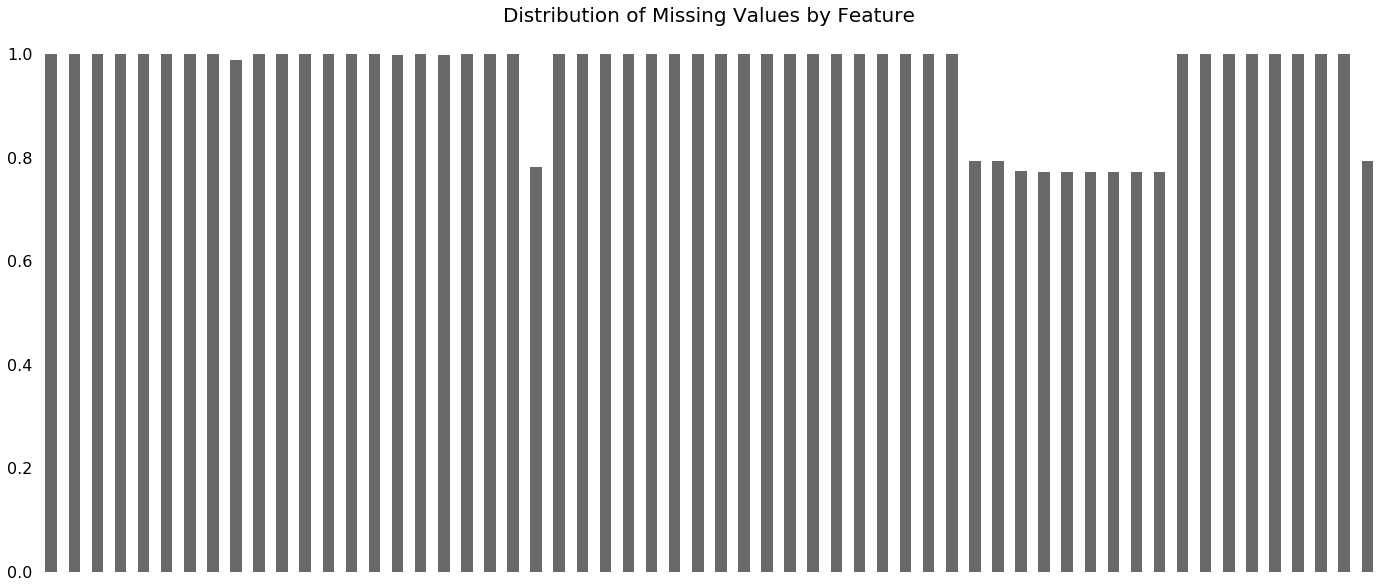

In [43]:
fig = missingno.bar(listings_explore)
plt.title('Distribution of Missing Values by Feature', fontsize=20)
plt.show()

## Numerical Features
First, we will analyze the numerical features. In hidden cells we create functions for analysis called `tukey_outliers` to identify Tukey outliers, `cdf` to plot a cdf, and `percentile` to calculate the percentile of a given score.

In [44]:
# Function to view tukey outliers
def tukey_outliers(df_dot_column):
    '''
    Function for detecting Tukey outliers using IQR
    
    data --- dataset
    feature --- string name of feature column
    
    returns 2 vars: outlier indices & outlier values
    
    Args:
    df_dot_column -- feature's Pandas series
    '''
    x = df_dot_column
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    return floor, ceiling

In [45]:
# Function to plot CDF's
def cdf(df, column):
    '''
    Function to plot CDF of a numerical feature
    
    Args:
    df -- dataframe
    column -- feature name
    '''
    plt.hist(df[column],
             cumulative=True, density=1, histtype='step', bins=len(df[column]))
    plt.show()

In [46]:
# Function to find percentile of a score
def percentile(df_dot_column, score):
    '''
    Function to find percentile of a score
    
    Args:
    
    df_dot_column -- Pandas series
    score -- score for calculating percentile
    '''
    from scipy.stats import percentileofscore
    return scipy.stats.percentileofscore(df_dot_column, score)

## Feature: price (Independent Variable) (numerical)

In [47]:
preliminaries(listings_explore, 'price')

Dtype:  object
Missing Values:  0


In [48]:
# Value counts
print(listings_explore.price.value_counts()[:5])

$150.00    1670
$100.00    1569
$50.00     1242
$60.00     1165
$200.00    1103
Name: price, dtype: int64


As we can see below, many of our numerical features are of dtype string, and have string characters such as "$" that must be removed before converting them to float or int.

In [49]:
# Remove string characters, convert to float
listings_explore['price'] = listings_explore['price'].astype('str').copy()
listings_explore['price'] = listings_explore['price'].str.replace('.00', '', regex=False).copy()
listings_explore['price'] = listings_explore['price'].str.replace('$', '', regex=False).copy()
listings_explore['price'] = listings_explore['price'].str.replace(',', '', regex=False).copy()
listings_explore['price'] = listings_explore['price'].astype('float64').copy()

In [50]:
# Check Tukey outlier range
tukey_outliers(listings_explore.price)

(-90.0, 334.0)

In [51]:
# Check percentile of $323 ceiling price
scipy.stats.percentileofscore(listings_explore.price, 323)

93.34144467213115

Because we are looking for standard Airbnb's, we drop listings priced above outlier $323/night. This will maintain 93.7% of our data. We also drop prices below 10/night because these are unrealistic accommodations which are likely mistakes (and there are very few of these).

Although our current Tukey outlier range tells us the outlier is at 334, after we clean many features below, the Price outlier value becomes 323. It would be improper to consider the outlier *before* feature cleaning, as we would be cleaning the features below based on a premature assumption.

In [52]:
# only include price in range [10, 323]
listings_explore = listings_explore[(listings_explore.price < 323) & (listings_explore.price >= 10)]

In [53]:
sum_stats(listings_explore.price)

nobs: 36432
median: 100.0
mode: [150.]
mean: 119.07444005270092
std: 66.94934559205603
minmax: (10.0, 322.0)
25% 65.0
50% 100.0
75% 157.0
skewness: 0.8964214310633671


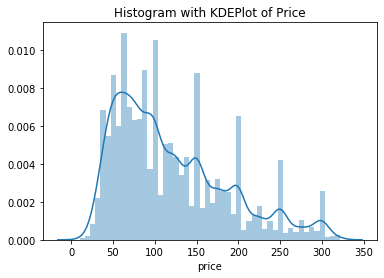

In [54]:
sns.distplot(listings_explore.price, bins=50)
plt.title('Histogram with KDEPlot of Price')
plt.show()

Here we see Price is a skewed right distribution with clear modes at even price values like 50, 75, 100, 125, 150, 200, 250, 300. This is due to hosts pricing their listings at even values.

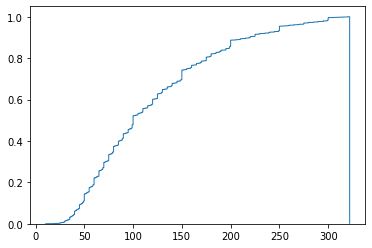

In [55]:
# Price CDF
cdf(listings_explore, 'price')

20% - 80% of prices are between 75 and 200 dollars.

In [56]:
num_attribs.append('price')

## **Feature: number_of_reviews_ltm** (last twelve months) (discrete)

In [57]:
preliminaries(listings_explore, 'number_of_reviews_ltm')

Dtype:  int64
Missing Values:  0


In order to isolate listings that are actually rented on a regular basis, we will assume that listings that are regularly rented will have at least 1 review in the last 12 months. Before dropping all listings with 0 reviews in ltm, we will check to confirm this is not solely due to new hosts who have not had enough time to accrue reviews:

In [58]:
# number of listings with host_since==0 and number_of_reviews_ltm==0
len(listings_explore[(listings_explore.host_since == 0) & (listings_explore.number_of_reviews_ltm == 0)])

0

Only a small fraction of the thousands of listings with 0 number_of_reviews_ltm are due to a host being new. This helps confirm that these listings are simply inactive. Therefore, we will drop listings with 0 number_of_reviews_ltm.

In [59]:
# only include number_of_reviews_ltm > 0
listings_explore = listings_explore[listings_explore.number_of_reviews_ltm > 0]

In [60]:
sum_stats(listings_explore.number_of_reviews_ltm)

nobs: 21998
median: 8.0
mode: [1]
mean: 15.640785525956906
std: 18.4863398234607
minmax: (1, 282)
25% 3.0
50% 8.0
75% 23.0
skewness: 2.4239319779583917


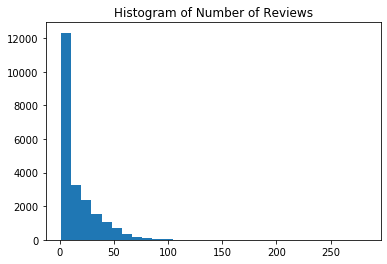

In [61]:
plt.hist(listings_explore.number_of_reviews_ltm, bins=30)
plt.title('Histogram of Number of Reviews')
plt.show()

In [62]:
tukey_outliers(listings_explore.number_of_reviews_ltm)

(-27.0, 53.0)

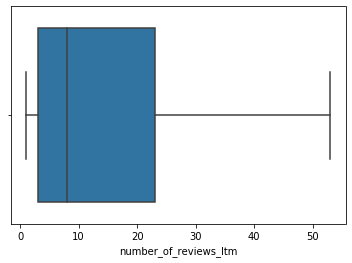

In [63]:
# Boxplot w/o outliers
sns.boxplot(listings_explore.number_of_reviews_ltm, showfliers=False)
plt.show()

75% of hosts have <=23 reviews, dropping off around 100 but outliers spread all the way to 600+. Skews right.

In [64]:
disc_attribs.append('number_of_reviews_ltm')

## **Feature: host_since** (discrete)

In [65]:
preliminaries(listings_explore, 'host_since')

Dtype:  object
Missing Values:  4


We will convert host_since to how many years host has been a host.

In [66]:
# Convert to how many years host
listings_explore['host_since'] = 2019 - listings_explore['host_since'].str[:4].astype('float64')

In [67]:
# Identify indices of missing values (True)
#listings_explore.host_since.isnull().sort_values()

In [68]:
# Check a missing value index
#listings_explore.loc[9339]

In [69]:
# Remove missing values
#listings_explore = listings_explore[listings_explore.host_since.notnull()].copy()

In [70]:
# Convert dtype to int
listings_explore['host_since'] = listings_explore.host_since.astype('float64')

In [71]:
sum_stats(listings_explore.host_since.dropna())

nobs: 21994
median: 4.0
mode: [4.]
mean: 4.191324906792762
std: 2.3706946253180505
minmax: (0.0, 11.0)
25% 2.0
50% 4.0
75% 6.0
skewness: 0.17188379478247912


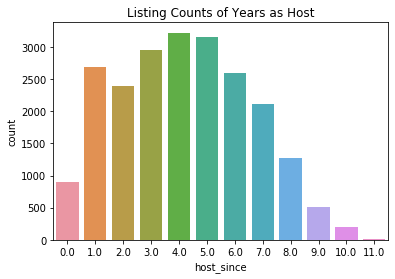

In [72]:
# Countplot
sns.countplot(listings_explore.host_since)
plt.title('Listing Counts of Years as Host')
plt.show()

Most hosts are spread rather evenly between 1 year and 7 years. 0 and 8-10 years are still significant amount. Skews slightly right.

In [73]:
disc_attribs.append('host_since')

## **Feature: number_of_reviews** (discrete)

In [74]:
preliminaries(listings_explore, 'number_of_reviews')

Dtype:  int64
Missing Values:  0


In [75]:
sum_stats(listings_explore.number_of_reviews)

nobs: 21998
median: 15.0
mode: [1]
mean: 36.58668969906355
std: 52.61377490330862
minmax: (1, 609)
25% 5.0
50% 15.0
75% 47.0
skewness: 2.8773175319133326


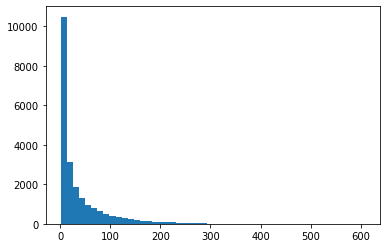

In [76]:
plt.hist(listings_explore.number_of_reviews, bins=50)
plt.show()

In [77]:
tukey_outliers(listings_explore.number_of_reviews)

(-58.0, 110.0)

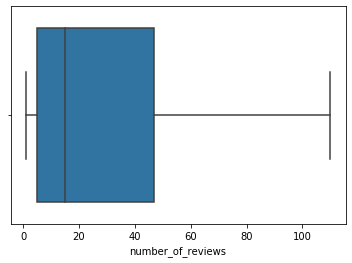

In [78]:
# Boxplot w/o outliers
sns.boxplot(listings_explore.number_of_reviews, showfliers=False)
plt.show()

In [79]:
percentile(listings_explore.number_of_reviews, 100)

89.77634330393673

90% of hosts have 100 reviews or less, with most closer to 0 than 100. Skews right.

In [80]:
disc_attribs.append('number_of_reviews')

## **Feature: host_listings_count** (discrete) (for analysis only)

We will use host_listings_count for our analysis, but we will not include it in the model because it is not visible to guests on the app, and the distribution is extremely skewed.

In [81]:
preliminaries(listings_explore, 'host_listings_count')

Dtype:  float64
Missing Values:  4


A host can't have 0 listings, so this must be a mistake. We will consider 0 values to be Nan.

In [82]:
# Amount of listings with 0 host_listings_count
len(listings_explore[listings_explore.host_listings_count == 0])

88

In [83]:
# Convert 0 values to Nan
listings_explore['host_listings_count'] = listings_explore.host_listings_count.replace(0.0, np.nan).astype('float64')

In [84]:
# Confirm no more 0 host_listings_count
preliminaries(listings_explore, 'host_listings_count', values=False)

Dtype:  float64
Missing Values:  92


In [85]:
sum_stats(listings_explore.host_listings_count.dropna())

nobs: 21906
median: 1.0
mode: [1.]
mean: 7.1070939468638725
std: 46.887025783622555
minmax: (1.0, 1108.0)
25% 1.0
50% 1.0
75% 3.0
skewness: 17.141199112472787


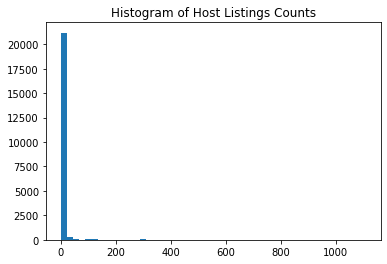

In [86]:
plt.hist(listings_explore.host_listings_count.dropna(), bins=50)
plt.title('Histogram of Host Listings Counts')
plt.show()

In [87]:
tukey_outliers(listings_explore.host_listings_count.dropna())

(-2.0, 6.0)

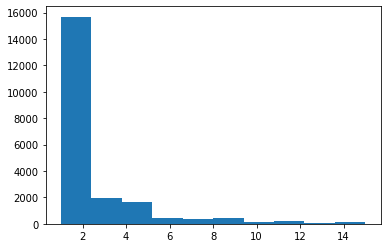

In [88]:
# Hist of host_listings_count <= 15
plt.hist(listings_explore[listings_explore.host_listings_count <= 15].host_listings_count)
plt.show()

In [89]:
percentile(listings_explore.host_listings_count.dropna(), 1)

26.360357892814754

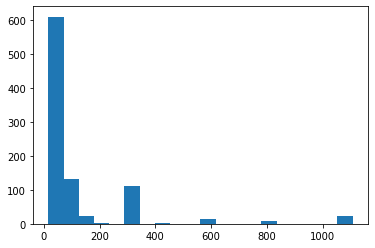

In [90]:
# Hist of host_listings_count >= 15
plt.hist(listings_explore[listings_explore.host_listings_count > 15].host_listings_count, bins=20)
plt.show()

About 26% of hosts have only 1 listing, and about 95% of hosts have 15 listings or less, but the distribution spans all the way past 1000 listings. Skews right.

Fill missing values manually using mode since feature won't be in model.

In [91]:
# Fill missing values (can do this now because feature will be dropped)
listings_explore['host_listings_count'] = listings_explore.host_listings_count.fillna(1.0)

In [92]:
#disc_attribs.append('host_listings_count')
drop_later.append('host_listings_count')

## **Feature: host_total_listings_count**

There are only 92 instances with differences to host_listings_count. Because we do not know the difference in measure between host_listings_count and host_total_listings_count, we will drop host_total_listings_count.

In [93]:
# compare listings with differences
len(listings_explore) - np.sum(listings_explore.host_total_listings_count == listings_explore.host_listings_count)

92

In [94]:
listings_explore.drop(columns='host_total_listings_count', inplace=True)
dropped_cols.append('host_total_listings_count')

## **Feature: latitude**

In [95]:
preliminaries(listings_explore, 'latitude')

Dtype:  float64
Missing Values:  0


In [96]:
num_attribs.append('latitude')

## **Feature: Longitude**

In [97]:
preliminaries(listings_explore, 'longitude')

Dtype:  float64
Missing Values:  0


In [98]:
num_attribs.append('longitude')

## **Feature: accommodates** (discrete)

In [99]:
preliminaries(listings_explore, 'accommodates')

Dtype:  int64
Missing Values:  0


In [100]:
sum_stats(listings_explore.accommodates)

nobs: 21998
median: 2.0
mode: [2]
mean: 2.8161196472406584
std: 1.682256249145391
minmax: (1, 16)
25% 2.0
50% 2.0
75% 4.0
skewness: 2.1068170931469448


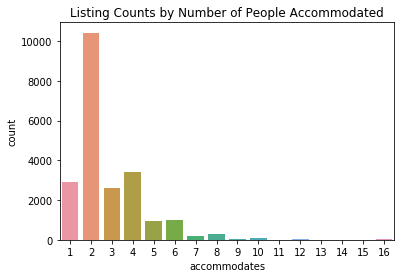

In [101]:
sns.countplot(listings_explore.accommodates)
plt.title('Listing Counts by Number of People Accommodated')
plt.show()

In [102]:
percentile(listings_explore.accommodates, 2)

36.92153832166561

In [103]:
percentile(listings_explore.accommodates, 6)

94.56086916992454

36% of listings accommodate 2 or less, with 95% ranging from 1-6. Skews right.

In [104]:
disc_attribs.append('accommodates')

## **Feature: bathrooms** (discrete)

In [105]:
preliminaries(listings_explore, 'bathrooms')

Dtype:  float64
Missing Values:  14


In [106]:
sum_stats(listings_explore.bathrooms.dropna())

nobs: 21984
median: 1.0
mode: [1.]
mean: 1.1118995633187774
std: 0.36543855004584563
minmax: (0.0, 7.0)
25% 1.0
50% 1.0
75% 1.0
skewness: 4.638480022358254


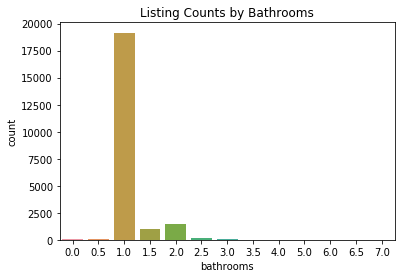

In [107]:
sns.countplot(listings_explore.bathrooms)
plt.title('Listing Counts by Bathrooms')
plt.show()

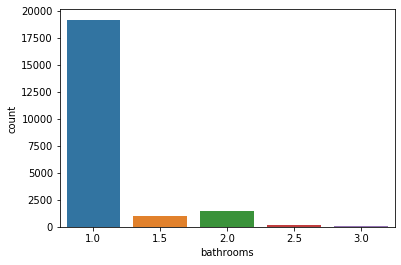

In [108]:
# hist of bathrooms between 1 & 3
sns.countplot((listings_explore[(listings_explore.bathrooms <= 3) & (listings_explore.bathrooms >= 1)]).bathrooms)
plt.show()

In [109]:
percentage_of(listings_explore.bathrooms, [1.0,1.5,2.0,2.5,3.0])

1.0    0.87
1.5    0.05
2.0    0.07
2.5    0.01
3.0    0.01
Name: bathrooms, dtype: float64

87% of all listings have 1 bathroom, while nearly all have 3 or less. Skews right.

In [110]:
disc_attribs.append('bathrooms')

## **Feature: bedrooms** (discrete)

In [111]:
preliminaries(listings_explore, 'bedrooms')

Dtype:  float64
Missing Values:  11


In [112]:
sum_stats(listings_explore.bedrooms.dropna())

nobs: 21987
median: 1.0
mode: [1.]
mean: 1.1328967116932733
std: 0.6512091143955939
minmax: (0.0, 9.0)
25% 1.0
50% 1.0
75% 1.0
skewness: 1.6047263383243688


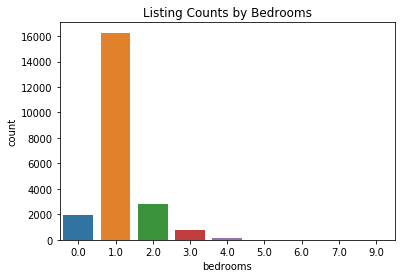

In [113]:
sns.countplot(listings_explore.bedrooms)
plt.title('Listing Counts by Bedrooms')
plt.show()

In [114]:
percentage_of(listings_explore.bedrooms, 1.0)

0.74

In [115]:
percentile(listings_explore.bedrooms.dropna(), 4.0)

99.55428207577205

74% of listings have 1 bedroom, and nearly all have 4 or less. Skews right.

We will inspect listings with >4 bedrooms just to ensure they are not inaccurate datapoints.

In [116]:
# View listings with >4 bedrooms
#listings_explore[listings_explore.bedrooms > 4][['bedrooms', 'beds', 'bathrooms', 'price']]

Although these are not completely "ordinary", as most NYC apartments have <=3 bedrooms, they are not anomalous to the point that we should consider them inaccurate. They could be large apartments, houses, etc. We will keep them in our data.

In [117]:
disc_attribs.append('bedrooms')

## **Feature: beds** (discrete)

In [118]:
preliminaries(listings_explore, 'beds')

Dtype:  float64
Missing Values:  5


In [119]:
sum_stats(listings_explore.beds.dropna())

nobs: 21993
median: 1.0
mode: [1.]
mean: 1.518755967807939
std: 1.0178587474497025
minmax: (0.0, 16.0)
25% 1.0
50% 1.0
75% 2.0
skewness: 2.6337905237694295


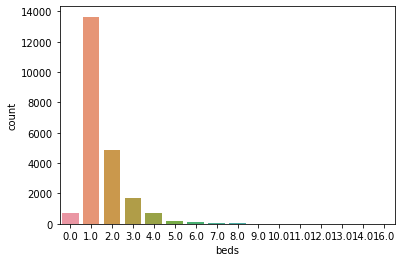

In [120]:
sns.countplot(listings_explore.beds)
plt.show()

In [121]:
percentage_of(listings_explore.beds, 1.0)

0.62

In [122]:
percentile(listings_explore.beds, 4.0)

96.66560596417857

62% have 1 bed, while nearly all have 4 or less beds.

In [123]:
disc_attribs.append('beds')

## **Feature: cleaning_fee**

In [124]:
preliminaries(listings_explore, 'cleaning_fee')

Dtype:  object
Missing Values:  2719


In [125]:
# Remove string characters, convert to float
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.str.replace('$', '', regex=False)
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.str.replace('.00', '', regex=False)
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.str.replace(',', '', regex=False)
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.astype('float64')

In [126]:
sum_stats(listings_explore.cleaning_fee.dropna())

nobs: 19279
median: 50.0
mode: [50.]
mean: 59.23035427148711
std: 45.99522070457579
minmax: (0.0, 600.0)
25% 25.0
50% 50.0
75% 85.0
skewness: 1.6209885047725725


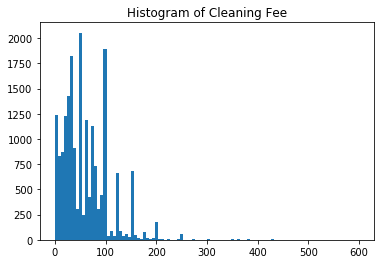

In [127]:
plt.hist(listings_explore.cleaning_fee.dropna(), bins=100)
plt.title('Histogram of Cleaning Fee')
plt.show()

To visualize the distribution's shape:

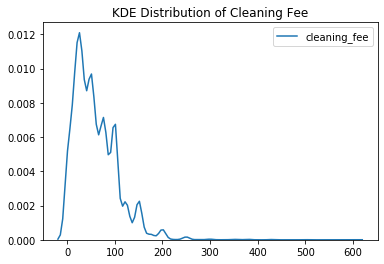

In [128]:
sns.kdeplot(listings_explore.cleaning_fee.dropna())
plt.title('KDE Distribution of Cleaning Fee')
plt.show()

In [129]:
tukey_outliers(listings_explore.cleaning_fee.dropna())

(-65.0, 175.0)

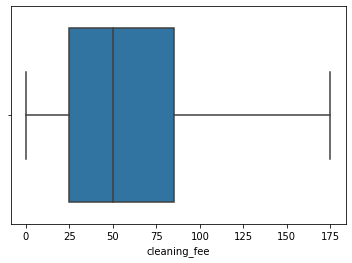

In [130]:
# Boxplot w/o outliers
sns.boxplot(listings_explore.cleaning_fee.dropna(), showfliers=False)
plt.show()

In [131]:
percentile(listings_explore.cleaning_fee.dropna(), 150)

95.63774054670886

Median cleaning fees is 50, 95% are 150 or less, but they can range up to 600. Skews right.

In [132]:
num_attribs.append('cleaning_fee')

## **Feature: guests_included** (discrete)

In [133]:
preliminaries(listings_explore, 'guests_included')

Dtype:  int64
Missing Values:  0


In [134]:
sum_stats(listings_explore.guests_included)

nobs: 21998
median: 1.0
mode: [1]
mean: 1.5695972361123738
std: 1.0859952450199053
minmax: (1, 16)
25% 1.0
50% 1.0
75% 2.0
skewness: 3.206714798294352


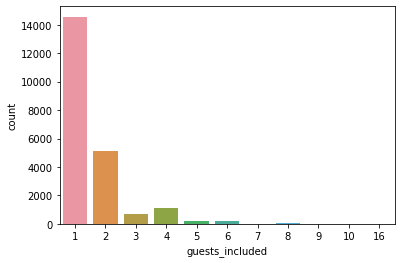

In [135]:
sns.countplot(listings_explore.guests_included)
plt.show()

In [136]:
percentage_of(listings_explore.guests_included, 1)

0.66

In [137]:
percentage_of(listings_explore.guests_included, 2)

0.23

In [138]:
percentile(listings_explore.guests_included, 4)

95.0609146286026

66% of guests included are 1, 23% are 2, and 95% of listings are 4 or less, though it skews right up to 16.

In [139]:
disc_attribs.append('guests_included')

## Feature: extra_people (discrete)

Cost per additional person.

In [140]:
preliminaries(listings_explore, 'extra_people')

Dtype:  object
Missing Values:  0


In [141]:
# Remove string characters, convert to float
listings_explore['extra_people'] = listings_explore.extra_people.str.replace('$', '', regex=False)
listings_explore['extra_people'] = listings_explore.extra_people.str.replace('.00', '', regex=False)
listings_explore['extra_people'] = listings_explore.extra_people.str.replace(',', '', regex=False)
listings_explore['extra_people'] = listings_explore.extra_people.astype('float64')

In [142]:
sum_stats(listings_explore.extra_people)

nobs: 21998
median: 10.0
mode: [0.]
mean: 17.015410491862898
std: 24.58359286094277
minmax: (0.0, 300.0)
25% 0.0
50% 10.0
75% 25.0
skewness: 4.385639195835524


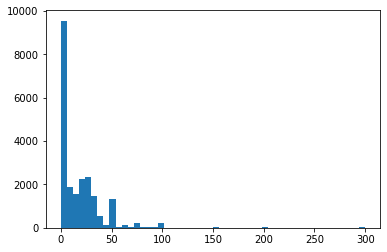

In [143]:
plt.hist(listings_explore.extra_people, bins=50)
plt.show()

In [144]:
tukey_outliers(listings_explore.extra_people)

(-37.5, 62.5)

Most listings do not charge for additional people, median is 10, skews right, outliers begin at 62.5 up to 300.

In [145]:
disc_attribs.append('extra_people')

## **Feature: minimum_nights** (discrete)

In [146]:
preliminaries(listings_explore, 'minimum_nights')

Dtype:  int64
Missing Values:  0


How there are minimum_nights values above 180 when the MAXIMUM airbnb allows is 6 months (180 days)? One solution is to drop the rows for which minimum_nights exceeds 180, another is to drop the feature altogether.

Because we are measuring standard Airbnb's, we are not measuring long-term Airbnb's. Therefore we should drop all rows whose minimum_nights exceed 7 nights. This has been chosen because a week seems like a reasonable amount of time for a minimum for a standard type of room that hasn't been heavily discounted due to quantity of long-term stay.

In [147]:
# only include minimum_nights <= 7
listings_explore = listings_explore[listings_explore.minimum_nights <= 7].copy(deep=True)

In [148]:
sum_stats(listings_explore.minimum_nights)

nobs: 19506
median: 2.0
mode: [2]
mean: 2.505280426535425
std: 1.5215104025115558
minmax: (1, 7)
25% 1.0
50% 2.0
75% 3.0
skewness: 1.2214395564997413


In [149]:
tukey_outliers(listings_explore.minimum_nights)

(-2.0, 6.0)

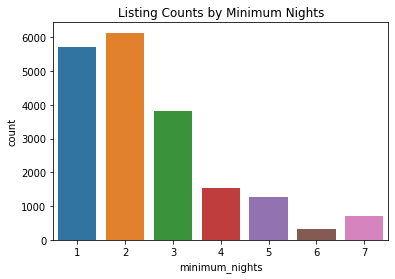

In [150]:
sns.countplot(listings_explore.minimum_nights)
plt.title('Listing Counts by Minimum Nights')
plt.show()

Most listings have 1-3 night minimum, but it ranges up to 7, with outliers at 6+. Skews right.

In [151]:
disc_attribs.append('minimum_nights')

## **Feature: maximum_nights** (discrete)

In [152]:
preliminaries(listings_explore, 'maximum_nights')

Dtype:  int64
Missing Values:  0


Maximum nights need not be filtered because we ensured minimum nights cannot exceed 7 nights, so pricing should remain short-term stay price regardless of how high the option can go.

In [153]:
sum_stats(listings_explore.maximum_nights)

nobs: 19506
median: 180.0
mode: [1125]
mean: 555.6846611299087
std: 706.7853914080637
minmax: (1, 60000)
25% 28.0
50% 180.0
75% 1125.0
skewness: 31.337019025454545


In [154]:
tukey_outliers(listings_explore.maximum_nights)

(-1617.5, 2770.5)

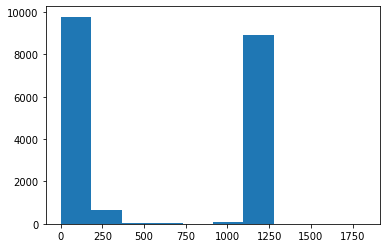

In [155]:
plt.hist(listings_explore[listings_explore.maximum_nights <= 2000].maximum_nights)
plt.show()

There is a surprisingly high mode at 1125 maximum_nights with a large gap before and after that number. This may be the maximum allowable by the Airbnb fill-in field. We will use 180 as a bin for any number of nights above 180 because 6 months is the max length of stay for short-term Airbnb as per policy.

In [156]:
# Cap maximum_nights at 180
listings_explore['maximum_nights'].values[listings_explore.maximum_nights > 180] = 180

In [157]:
sum_stats(listings_explore.maximum_nights)

nobs: 19506
median: 180.0
mode: [180]
mean: 106.64252025017943
std: 76.91872495258504
minmax: (1, 180)
25% 28.0
50% 180.0
75% 180.0
skewness: -0.16872493511923184


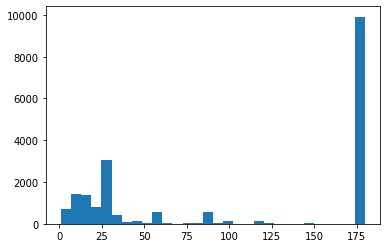

In [158]:
plt.hist(listings_explore.maximum_nights, bins=30)
plt.show()

In [159]:
percentage_of(listings_explore.maximum_nights, 180)

0.51

In [160]:
percentile(listings_explore.maximum_nights, 50)

41.05147134215113

Distribution's mode is at 180 maximum_nights (51% of listings), skewed left with 40% at or below 100 nights.

In [161]:
disc_attribs.append('maximum_nights')

**Features: minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm**

We will drop these specific features in lieu of the features: minimum_nights and maximum_nights. NTM means 'next twelve months.'

In [162]:
listings_explore.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], inplace=True)
dropped_cols.extend(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'])

## **Feature: availability_30** (discrete)

In [163]:
preliminaries(listings_explore, 'availability_30')

Dtype:  int64
Missing Values:  0


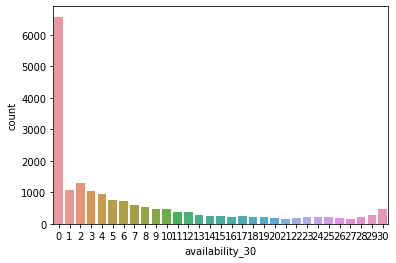

In [164]:
sns.countplot(listings_explore.availability_30)
plt.show()

Mode is at 0 availability_30 with small amounts ranging from 1-30. Skews right.

In [165]:
disc_attribs.append('availability_30')

## **Feature: availability_60** (discrete)

In [166]:
preliminaries(listings_explore, 'availability_60')

Dtype:  int64
Missing Values:  0


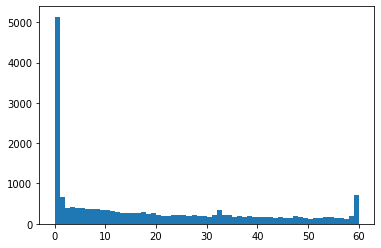

In [167]:
plt.hist(listings_explore.availability_60, bins=60)
plt.show()

Mode at 0 with a small spike at 60. Skews right.

In [168]:
disc_attribs.append('availability_60')

## **Feature: availability_90**

In [169]:
preliminaries(listings_explore, 'availability_90')

Dtype:  int64
Missing Values:  0


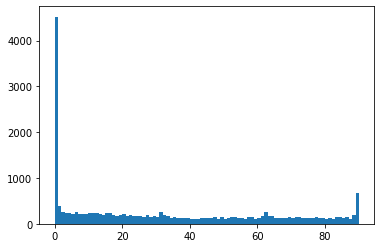

In [170]:
plt.hist(listings_explore.availability_90, bins=90)
plt.show()

Mode at 0 with small spike at 90, skews right.

In [171]:
disc_attribs.append('availability_90')

## **Feature: availability_365**

In [172]:
preliminaries(listings_explore, 'availability_365')

Dtype:  int64
Missing Values:  0


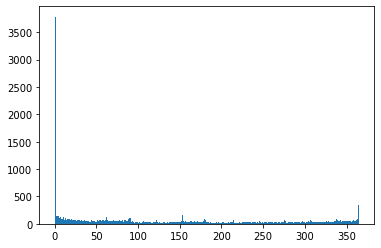

In [173]:
plt.hist(listings_explore.availability_365, bins=365)
plt.show()

Mode at 0 with small spike at 365, skews right.

In [174]:
disc_attribs.append('availability_365')

## **Features: first_review, last_review**

Feature first_review dropped in lieu of feature number_of_reviews because that covers all reviews, and host_since measures how long a host has been hosting.

Feature last_review dropped in lieu of feature number_of_reviews_ltm because that covers the amount of recent reviews for potential renters to see.

In [175]:
listings_explore.drop(columns=['first_review', 'last_review'], inplace=True)
dropped_cols.extend(['first_review', 'last_review'])

## Feature: review_scores_rating (discrete)

In [176]:
preliminaries(listings_explore, 'review_scores_rating')

Dtype:  float64
Missing Values:  259


In [177]:
sum_stats(listings_explore.review_scores_rating.dropna())

nobs: 19247
median: 96.0
mode: [100.]
mean: 94.31511404374707
std: 7.138444164094625
minmax: (20.0, 100.0)
25% 92.0
50% 96.0
75% 99.0
skewness: -3.7195392855576648


In [178]:
tukey_outliers(listings_explore.review_scores_rating.dropna())

(81.5, 109.5)

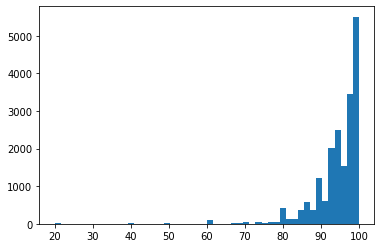

In [179]:
plt.hist(listings_explore.review_scores_rating.dropna(), bins=50)
plt.show()

In [180]:
percentage_of(listings_explore.review_scores_rating, 100)

0.23

In [181]:
100 - percentile(listings_explore.review_scores_rating, 90)

83.33077001948118

Mode at 100 (23% of ratings), 84% of ratings are between 90 and 100. Skews left.

In [182]:
disc_attribs.append('review_scores_rating')

## **Feature: review_scores_accuracy** (Discrete)

In [183]:
preliminaries(listings_explore, 'review_scores_accuracy')

Dtype:  float64
Missing Values:  261


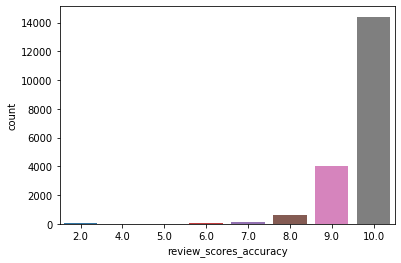

In [184]:
sns.countplot(listings_explore.review_scores_accuracy.dropna())
plt.show()

Mode at 10, some at 9, the rest small down to 2. Skews left.

In [185]:
disc_attribs.append('review_scores_accuracy')

## **Feature: review_scores_cleanliness** (Discrete)

In [186]:
preliminaries(listings_explore, 'review_scores_cleanliness')

Dtype:  float64
Missing Values:  261


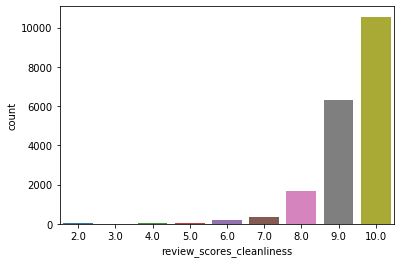

In [187]:
sns.countplot(listings_explore.review_scores_cleanliness.dropna())
plt.show()

Mode at 10, some at 9 and 8, skews left.

In [188]:
disc_attribs.append('review_scores_cleanliness')

## **Feature: review_scores_checkin** (Discrete)

In [189]:
preliminaries(listings_explore, 'review_scores_checkin')

Dtype:  float64
Missing Values:  263


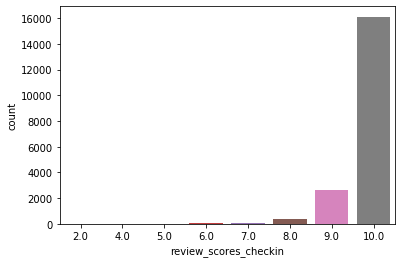

In [190]:
sns.countplot(listings_explore.review_scores_checkin.dropna())
plt.show()

Mode at 10, some at 9, skews left.

In [191]:
disc_attribs.append('review_scores_checkin')

## **Feature: review_scores_communication** (Discrete)

In [192]:
preliminaries(listings_explore, 'review_scores_communication')

Dtype:  float64
Missing Values:  261


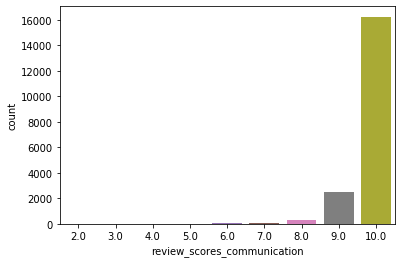

In [193]:
sns.countplot(listings_explore.review_scores_communication.dropna())
plt.show()

Mode at 10, some at 9, skews left.

In [194]:
disc_attribs.append('review_scores_communication')

## **Feature: review_scores_location** (Discrete)

In [195]:
preliminaries(listings_explore, 'review_scores_location')

Dtype:  float64
Missing Values:  263


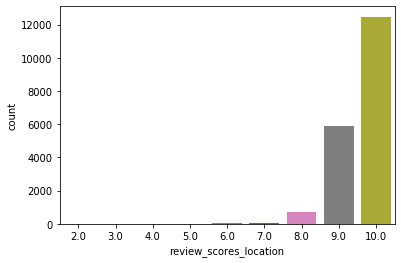

In [196]:
sns.countplot(listings_explore.review_scores_location.dropna())
plt.show()

Mode at 10, half at 9, some at 8, skews left.

In [197]:
disc_attribs.append('review_scores_location')

## **Feature: review_scores_value** (Discrete)

In [198]:
preliminaries(listings_explore, 'review_scores_value')

Dtype:  float64
Missing Values:  263


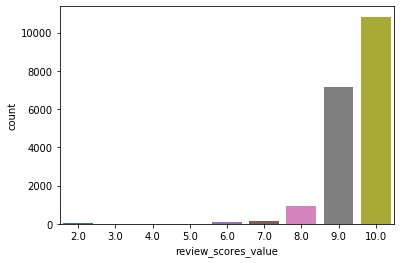

In [199]:
sns.countplot(listings_explore.review_scores_value.dropna())
plt.show()

Mode at 10, close to 9, a few at 8, skews left.

In [200]:
disc_attribs.append('review_scores_value')

**Features: calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms**

These features have been dropped as they do not seem to directly contribute much more information to the potential renter as to whether they will rent or not. I understand that there may be a correlation between having more or less listings and, for instance, reviews or price, but we have chosen to leave these features out for reasons of streamlining this process, and I feel the other features cover much of the needed to determine the price.

In [201]:
listings_explore.drop(columns=['calculated_host_listings_count',
                               'calculated_host_listings_count_entire_homes',
                               'calculated_host_listings_count_private_rooms',
                               'calculated_host_listings_count_shared_rooms'], inplace=True)
dropped_cols.extend(['calculated_host_listings_count',
                     'calculated_host_listings_count_entire_homes',
                     'calculated_host_listings_count_private_rooms',
                     'calculated_host_listings_count_shared_rooms'])

## **Feature: reviews_per_month**

In [202]:
preliminaries(listings_explore, 'reviews_per_month')

Dtype:  float64
Missing Values:  0


In [203]:
sum_stats(listings_explore.reviews_per_month)

nobs: 19506
median: 1.37
mode: [1.]
mean: 1.9028078539936428
std: 1.7616027593254382
minmax: (0.02, 28.0)
25% 0.58
50% 1.37
75% 2.77
skewness: 1.969132469374286


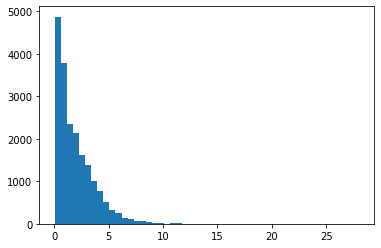

In [204]:
plt.hist(listings_explore.reviews_per_month, bins=50)
plt.show()

Mode at 0, many up to 4. Skews right up to 28.

In [205]:
num_attribs.append('reviews_per_month')

# Categorical Features

In [206]:
# Function to convert true/false values to binary
def convert_tf(df, column):
    '''
    Converts t/f values in a Series to 0/1.
    '''
    df[column] = df[column].map({'t': 1, 'f': 0}, na_action='ignore')
    return df[column]

## **Feature: host_is_superhost**

In [207]:
preliminaries(listings_explore, 'host_is_superhost', values=True)

Dtype:  object
Missing Values:  4
f    13983
t     5519
Name: host_is_superhost, dtype: int64


In [208]:
# Convert t/f to 1/0
listings_explore['host_is_superhost'] = convert_tf(listings_explore, 'host_is_superhost')

In [209]:
preliminaries(listings_explore, 'host_is_superhost', values=True)

Dtype:  float64
Missing Values:  4
0.0    13983
1.0     5519
Name: host_is_superhost, dtype: int64


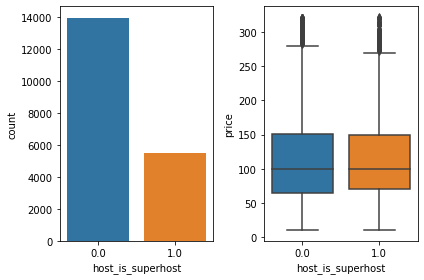

In [210]:
fig, ax = plt.subplots(1, 2)
sns.countplot(listings_explore.host_is_superhost, ax=ax[0])
sns.catplot('host_is_superhost', 'price', data=listings_explore, kind='box', ax=ax[1])
fig.tight_layout()
plt.close()
plt.show()

In [211]:
percentage_of(listings_explore.host_is_superhost, 1.0)

0.28

28% of hosts are superhosts. Interestingly, price does not look to be affected by whether a host is a superhost or not. If this is true, then the superhost badge is more a marketing tool for Airbnb to synthetically reward loyal hosts than it is a tool to help hosts generate more revenue.

In [212]:
cat_attribs.append('host_is_superhost')

## **Feature: host_has_profile_pic**

In [213]:
preliminaries(listings_explore, 'host_has_profile_pic', values=True)

Dtype:  object
Missing Values:  4
t    19466
f       36
Name: host_has_profile_pic, dtype: int64


Virtually all listings have a profile picture, so we will remove this feature from the data.

In [214]:
listings_explore.drop(columns='host_has_profile_pic', inplace=True)
dropped_cols.append('host_has_profile_pic')

## **Feature: host_identity_verified** (For analysis only)

This column is only for analysis purposes and will be removed from the model, as the potential guest cannot see whether a host is verified.

In [215]:
preliminaries(listings_explore, 'host_identity_verified', values=True)

Dtype:  object
Missing Values:  4
f    9841
t    9661
Name: host_identity_verified, dtype: int64


In [216]:
# Convert t/f to 1/0
listings_explore['host_identity_verified'] = convert_tf(listings_explore, 'host_identity_verified')

In [217]:
preliminaries(listings_explore, 'host_identity_verified', values=True)

Dtype:  float64
Missing Values:  4
0.0    9841
1.0    9661
Name: host_identity_verified, dtype: int64


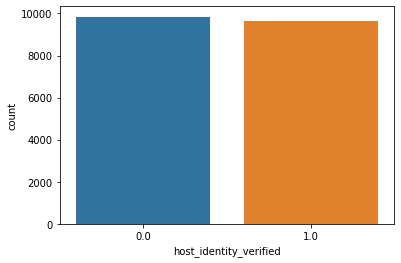

In [218]:
sns.countplot(listings_explore.host_identity_verified)
plt.show()

About half of hosts are verified.

In [219]:
#cat_attribs.append('host_identity_verified')
drop_later.append('host_identity_verified')

## **Feature: neighbourhood_cleansed**

In [220]:
preliminaries(listings_explore, 'neighbourhood_cleansed')

Dtype:  object
Missing Values:  0


A list of value counts is the best way to view this data.

In [221]:
cat_attribs.append('neighbourhood_cleansed')

## **Feature: neighbourhood_group_cleansed**

In [222]:
preliminaries(listings_explore, 'neighbourhood_group_cleansed', values=True)

Dtype:  object
Missing Values:  0
Brooklyn         8614
Manhattan        7341
Queens           2773
Bronx             560
Staten Island     218
Name: neighbourhood_group_cleansed, dtype: int64


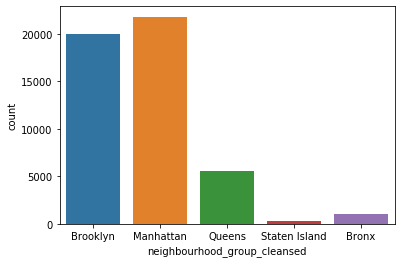

In [223]:
sns.countplot(listings.neighbourhood_group_cleansed)
plt.show()

In [224]:
percentage_of(listings_explore.neighbourhood_group_cleansed, pd.unique(listings_explore.neighbourhood_group_cleansed))

Brooklyn         0.44
Manhattan        0.38
Bronx            0.03
Queens           0.14
Staten Island    0.01
Name: neighbourhood_group_cleansed, dtype: float64

Brooklyn (44%) and Manhattan (38%) have by far the most listings, followed by Queens (14%), with Bronx (3%) and Staten Island (1%) quite low.

In [225]:
cat_attribs.append('neighbourhood_group_cleansed')

**Feature: zipcode**

In [226]:
preliminaries(listings_explore, 'zipcode')

Dtype:  object
Missing Values:  216


In [227]:
# Convert zipcodes to float
#listings_explore['zipcode'] = listings_train['zipcode']
#listings_explore['zipcode'] = listings_explore['zipcode'].str.replace('-', '', regex=False)
#listings_explore['zipcode'] = listings_explore['zipcode'].str.replace('NY ', '', regex=False)
#listings_explore['zipcode'] = listings_explore['zipcode'].str.replace('\n', '', regex=False)
#listings_explore['zipcode'] = listings_explore['zipcode'].str[:5].astype('float')

Because we have longitude and latitude, which is a more accurate measure of location, along with neighbourhood_cleansed, we will drop the zipcode feature.

In [228]:
listings_explore.drop(columns='zipcode', inplace=True)
dropped_cols.append('zipcode')

## **Feature: property_type**

In [229]:
preliminaries(listings_explore, 'property_type')

Dtype:  object
Missing Values:  0


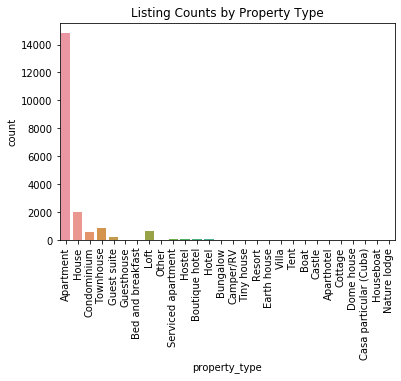

In [230]:
fig = sns.countplot(listings_explore.property_type)
fig.set_xticklabels(labels=pd.unique(listings_explore.property_type), rotation=90)
plt.title('Listing Counts by Property Type')
plt.show()

Because we are isolating more standard Airbnbs, we will only keep the following property types from the data:

In [231]:
# Filter specific property types
listings_explore = listings_explore[
                       (listings_explore.property_type == 'Apartment') |
                       (listings_explore.property_type == 'House') |
                       (listings_explore.property_type == 'Condominium') |
                       (listings_explore.property_type == 'Townhouse') |
                       (listings_explore.property_type == 'Guest suite') |
                       (listings_explore.property_type == 'Guesthouse') |
                       (listings_explore.property_type == 'Loft') |
                       (listings_explore.property_type == 'Serviced apartment') |
                       (listings_explore.property_type == 'Tiny house') |
                       (listings_explore.property_type == 'Earth house') |
                       (listings_explore.property_type == 'Villa') |
                       (listings_explore.property_type == 'Castle') |
                       (listings_explore.property_type == 'Cottage') |
                       (listings_explore.property_type == 'Dome house')
                    ]

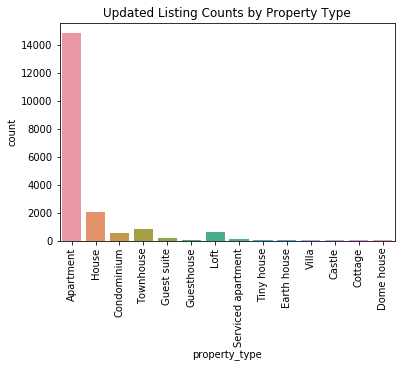

In [232]:
fig = sns.countplot(listings_explore.property_type)
fig.set_xticklabels(labels=pd.unique(listings_explore.property_type), rotation=90)
plt.title('Updated Listing Counts by Property Type')
plt.show()

In [233]:
percentage_of(listings_explore.property_type, pd.unique(listings_explore.property_type))

Apartment             0.77
House                 0.11
Condominium           0.03
Townhouse             0.04
Guest suite           0.01
Guesthouse            0.00
Loft                  0.03
Serviced apartment    0.00
Tiny house            0.00
Earth house           0.00
Villa                 0.00
Castle                0.00
Cottage               0.00
Dome house            0.00
Name: property_type, dtype: float64

77% of listings are apartments, 11% are houses, with the remaining 10% in condominiums, townhomes, lofts, and only a few of the others.

In [234]:
cat_attribs.append('property_type')

## **Feature: room_type**

In [235]:
preliminaries(listings_explore, 'room_type', values=True)

Dtype:  object
Missing Values:  0
Private room       9419
Entire home/apt    9361
Shared room         462
Name: room_type, dtype: int64


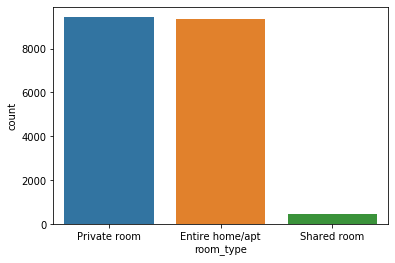

In [236]:
sns.countplot(listings_explore.room_type)
plt.show()

In [237]:
percentage_of(listings_explore.room_type, pd.unique(listings_explore.room_type))

Private room       0.49
Entire home/apt    0.49
Shared room        0.02
Name: room_type, dtype: float64

About 50/50 private room / entire home with only a few shared room.

In [238]:
cat_attribs.append('room_type')

**Feature: is_location_exact**

In [239]:
preliminaries(listings_explore, 'is_location_exact', values=True)

Dtype:  object
Missing Values:  0
t    15435
f     3807
Name: is_location_exact, dtype: int64


We're not clear what this feature measures, as we already have multiple features with location data, so we will delete this feature.

In [240]:
listings_explore.drop(columns='is_location_exact', inplace=True)
dropped_cols.append('is_location_exact')

## **Feature: bed_type**

In [241]:
preliminaries(listings_explore, 'bed_type', values=True)

Dtype:  object
Missing Values:  0
Real Bed         18933
Futon              118
Pull-out Sofa      113
Airbed              51
Couch               27
Name: bed_type, dtype: int64


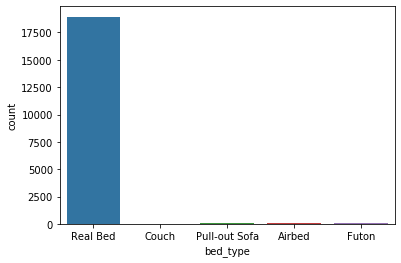

In [242]:
sns.countplot(listings_explore.bed_type)
plt.show()

In [243]:
percentage_of(listings_explore.bed_type, pd.unique(listings_explore.bed_type))

Real Bed         0.98
Couch            0.00
Pull-out Sofa    0.01
Airbed           0.00
Futon            0.01
Name: bed_type, dtype: float64

Virtually all real bed, with only a few of the others. Although nearly all values are one type, a real bed versus the other options is important to the quality of the listing, so we will keep this feature.

In [244]:
cat_attribs.append('bed_type')

## **Feature: amenities**
The amenities feature originally consists of string lists of each amenity of the listing. We split this into binary columns for each amenity in order to accurately measure each amenity each listing has.

In [245]:
# Example of amenity string list
listings_explore.amenities[0]

'{TV,"Cable TV",Internet,Wifi,"Wheelchair accessible",Kitchen,"Free parking on premises",Elevator,"Free street parking","Buzzer/wireless intercom",Heating,"Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Self check-in",Keypad,"Outlet covers","Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout"}'

In [246]:
# Remove empty values ({})
listings_explore = listings_explore[listings_explore.amenities != '{}']

In [247]:
# Remove brackets and quotes, split by ','
listings_explore['amenities'] = listings_explore.amenities.astype('str').str.replace('{', '', regex=False)
listings_explore['amenities'] = listings_explore.amenities.str.replace('}', '', regex=False)
listings_explore['amenities'] = listings_explore.amenities.str.replace('"', '', regex=False)
listings_explore['amenities'] = listings_explore.amenities.str.split(',')

In [248]:
# An example listing's list of amenities
listings_explore['amenities'].iloc[1]

['TV',
 'Internet',
 'Wifi',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Family/kid friendly',
 'Washer',
 'Dryer',
 'Smoke detector',
 'Carbon monoxide detector',
 'Essentials',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'Hot water',
 'Other']

In [249]:
# Create columns for each amenity using MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
amenities_df = pd.DataFrame(mlb.fit_transform(listings_explore.amenities))
classes = mlb.classes_ # amenity names
amenities_df.columns = classes # add amenity names as columns

In [250]:
# Test view a row of amenities
amenities_df.head(1)

,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Bathtub with bath chair,Beach essentials,Beachfront,Bed linens,Breakfast,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling hoist,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Dryer,EV charger,Electric profiling bed,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Extra space around bed,Extra space around shower and toilet,Family/kid friendly,Fire extinguisher,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to guest entrance,Free parking on premises,Free street parking,Full kitchen,Game console,Garden or backyard,Ground floor access,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hot water kettle,Indoor fireplace,Internet,Iron,Keypad,Kitchen,Kitchenette,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Mobile hoist,No stairs or steps to enter,Other,Other pet(s),Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pocket wifi,Pool,Pool with pool hoist,Private bathroom,Private entrance,Private living room,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski-in/Ski-out,Smart lock,Smoke detector,Smoking allowed,Stair gates,Stove,Suitable for events,TV,Table corner guards,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0


In [251]:
# Save indices
indices = np.array(listings_explore.index)
# Merge new amenities columns with original dataframe
listings_explore = pd.concat([listings_explore.reset_index(drop=True), amenities_df.reset_index(drop=True)], axis=1)
# Reapply original indices
listings_explore = listings_explore.set_index(indices)
# Drop 'amenities' column
listings_explore.drop(columns='amenities', inplace=True)
# Test view DataFrame with amenities added
listings_explore.head(1)

,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Bathtub with bath chair,Beach essentials,Beachfront,Bed linens,Breakfast,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling hoist,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Dryer,EV charger,Electric profiling bed,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Extra space around bed,Extra space around shower and toilet,Family/kid friendly,Fire extinguisher,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to guest entrance,Free parking on premises,Free street parking,Full kitchen,Game console,Garden or backyard,Ground floor access,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hot water kettle,Indoor fireplace,Internet,Iron,Keypad,Kitchen,Kitchenette,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Mobile hoist,No stairs or steps to enter,Other,Other pet(s),Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pocket wifi,Pool,Pool with pool hoist,Private bathroom,Private entrance,Private living room,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski-in/Ski-out,Smart lock,Smoke detector,Smoking allowed,Stair gates,Stove,Suitable for events,TV,Table corner guards,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
37753,2.0,0.0,1.0,0.0,Bushwick,Brooklyn,40.70229,-73.92223,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,85.0,25.0,1,20.0,1,60,2 months ago,t,6,20,50,325,38,38,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,5.09,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0


In [252]:
# List of columns to drop from new amenities columns
dropped_amenities = []
dropped_amenities.extend([" toilet","Accessible-height bed","Accessible-height toilet","Air purifier","BBQ grill","Baby bath","Bathtub",
"Baby monitor","Babysitter recommendations","Bathtub with bath chair","Beach essentials","Beachfront","Bed linens","Breakfast",
"Building staff","Buzzer/wireless intercom","Cable TV","Carbon monoxide detector",'Cat(s)',"Ceiling hoist","Changing table",
"Children’s books and toys","Children’s dinnerware","Cleaning before checkout","Disabled parking spot",'Dog(s)',"EV charger",
"Electric profiling bed","Ethernet connection",'Extra pillows and blankets',"Extra space around bed","Extra space around shower and toilet","Fire extinguisher",
"Fireplace guards","Firm mattress","First aid kit","Fixed grab bars for shower","Fixed grab bars for toilet","Flat path to guest entrance","Full kitchen",
"Game console","Ground floor access","High chair","Hot water kettle",'Indoor fireplace',"Internet","Keypad","Kitchenette",
'Lake access','Lock on bedroom door','Lockbox','Long term stays allowed','Luggage dropoff allowed',"Mobile hoist","No stairs or steps to enter",
"Other",'Other pet(s)',"Outlet covers",'Oven',"Pack ’n Play/travel crib","Pets live on this property","Pocket wifi","Pool with pool hoist",'Private bathroom',
"Private living room","Roll-in shower","Room-darkening shades","Safety card","Shower chair","Single level home","Ski-in/Ski-out",
"Smart lock","Smoke detector","Stair gates","Suitable for events","Table corner guards","Washer / Dryer","Well-lit path to entrance",
"Wheelchair accessible","Wide clearance to shower","Wide doorway to guest bathroom","Wide entrance","Wide entrance for guests",
"Wide entryway","Wide hallways","Window guards","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"])
# Drop unused amenities
listings_explore.drop(columns=dropped_amenities, inplace=True)

In [253]:
# Create list of amenities columns
all_cols = list(listings_explore.columns)
amen_index = all_cols.index('24-hour check-in') # beginning of amenities columns
amen_attribs = all_cols[amen_index:]

In [254]:
# Plot amenities columns
#for col in amen_attribs:
#    preliminaries(listings_explore, col)
#    fig, (ax1, ax2) = plt.subplots(1, 2)
#    sns.countplot(listings_explore[col], ax=ax1)
#    sns.catplot(col, 'price', data=listings_explore, kind='box', ax=ax2)
#    fig.tight_layout()
#    plt.close()
#    plt.show()

**Feature: calendar_updated**

In [255]:
listings_explore.calendar_updated.value_counts()[:5]

today           2575
2 weeks ago     2108
a week ago      1491
3 weeks ago     1332
2 months ago    1317
Name: calendar_updated, dtype: int64

This feature doesn't seem to directly affect the price of a listing. A calendar can be updated or not, but the price is still the listed price. We will drop this feature.

However, this could be useful for analysis on prices for listings that update their prices frequently vs. listings that haven't updated in a while.

In [256]:
listings_explore.drop(columns='calendar_updated', inplace=True)
dropped_cols.append('calendar_updated')

**Feature: has_availability**

In [257]:
preliminaries(listings_explore, 'has_availability', values=True)

Dtype:  object
Missing Values:  0
t    19232
Name: has_availability, dtype: int64


This feature is dropped because all values are the same.

In [258]:
listings_explore.drop(columns='has_availability', inplace=True)
dropped_cols.append('has_availability')

## **Feature: instant_bookable**

In [259]:
preliminaries(listings_explore, 'instant_bookable', values=True)

Dtype:  object
Missing Values:  0
f    10763
t     8469
Name: instant_bookable, dtype: int64


In [260]:
# Convert t/f to 1/0
listings_explore['instant_bookable'] = convert_tf(listings_explore, 'instant_bookable')

In [261]:
preliminaries(listings_explore, 'instant_bookable', values=True)

Dtype:  int64
Missing Values:  0
0    10763
1     8469
Name: instant_bookable, dtype: int64


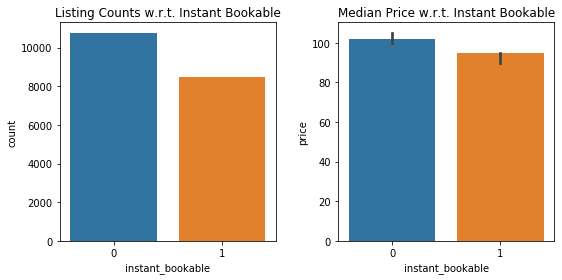

In [262]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.countplot(listings_explore.instant_bookable, ax=ax[0])
ax[0].set_title('Listing Counts w.r.t. Instant Bookable')
sns.barplot(x='instant_bookable', y='price', data=listings_explore, estimator=median, ax=ax[1])
ax[1].set_title('Median Price w.r.t. Instant Bookable')
plt.tight_layout()
plt.show()

In [263]:
percentage_of(listings_explore.instant_bookable, [0,1])

0    0.56
1    0.44
Name: instant_bookable, dtype: float64

instant_bookable and non-instant have similar counts, but not instant bookable has about 12% more instances and a slightly higher median price.

In [264]:
cat_attribs.append('instant_bookable')

## **Feature: cancellation_policy**

In [265]:
preliminaries(listings_explore, 'cancellation_policy')

Dtype:  object
Missing Values:  0


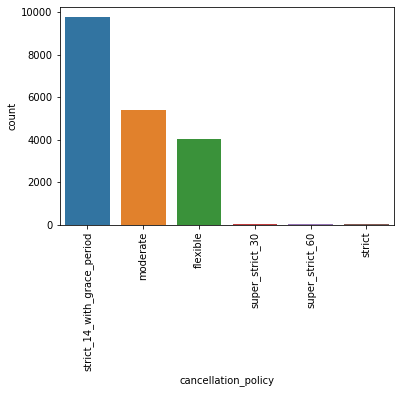

In [266]:
fig = sns.countplot(listings_explore.cancellation_policy)
fig.set_xticklabels(labels=listings_explore.cancellation_policy.unique(), rotation=90)
plt.show()

In [267]:
percentage_of(listings_explore.cancellation_policy, pd.unique(listings_explore.cancellation_policy))

strict_14_with_grace_period    0.51
moderate                       0.28
flexible                       0.21
super_strict_30                0.00
super_strict_60                0.00
strict                         0.00
Name: cancellation_policy, dtype: float64

Strict with 14 grace period has 51%, moderate and flexible have about 28%, and the other 3 have almost none.

In [268]:
cat_attribs.append('cancellation_policy')

**Feature: require_guest_profile_picture**

In [269]:
preliminaries(listings_explore, 'require_guest_profile_picture', values=True)

Dtype:  object
Missing Values:  0
f    18697
t      535
Name: require_guest_profile_picture, dtype: int64


In [270]:
# Convert t/f to 1/0
listings_explore['require_guest_profile_picture'] = convert_tf(listings_explore, 'require_guest_profile_picture')

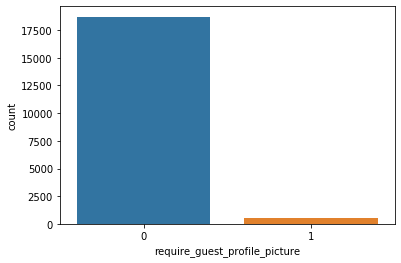

In [271]:
sns.countplot(listings_explore.require_guest_profile_picture)
plt.show()

Virtually no listings require guest profile picture.

This feature is quite imbalanced and intuitively does not factor into price very much for a potential guest (as adding a profile picture is rather quick and easy with smartphones today), so we will remove this feature.

In [272]:
listings_explore.drop(columns='require_guest_profile_picture', inplace=True)
dropped_cols.append('require_guest_profile_picture')

#### **Feature: require_guest_phone_verification**

In [273]:
preliminaries(listings_explore, 'require_guest_phone_verification', values=True)

Dtype:  object
Missing Values:  0
f    18614
t      618
Name: require_guest_phone_verification, dtype: int64


In [274]:
# Convert t/f to 1/0
listings_explore['require_guest_phone_verification'] = convert_tf(listings_explore, 'require_guest_phone_verification')

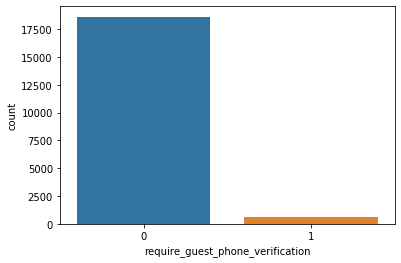

In [275]:
sns.countplot(listings_explore.require_guest_phone_verification)
plt.show()

This feature is quite imbalanced and intuitively does not factor into price very much for a potential guest (as phone verification is rather easy with smartphones today), so we will remove this feature.

In [276]:
listings_explore.drop(columns='require_guest_phone_verification', inplace=True)
dropped_cols.append('require_guest_phone_verification')

# Feature Correlation

Now that we have finished our first round of feature cleaning and analysis, we will move on to analyzing feature correlations.

Here, we will analyze Pearson and Spearman (linear and non-linear) feature correlations in order to remove features with multicollinearity, and identify features highly correlated with our label feature 'price'.

In [277]:
# Send 'price' column to end of dataframe for correlation matrix readability
all_cols = listings_explore.columns.tolist()
price_ind = all_cols.index('price')
new_cols = all_cols[0:15] + all_cols[16:] + [all_cols[15]]
new_cols
listings_explore = listings_explore[new_cols]

### Pearson Linear Correlations

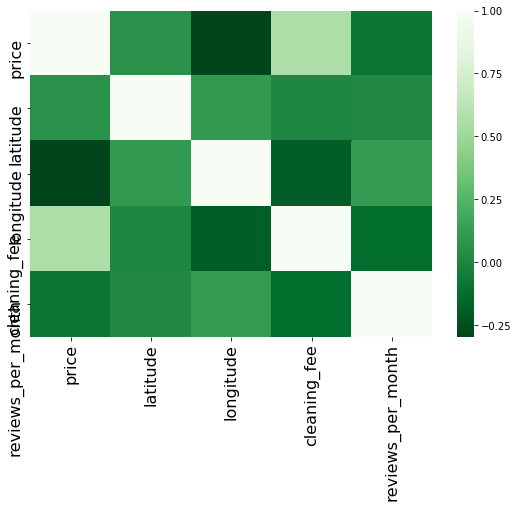

In [278]:
# Pearson Correlation Matrix
pearson_cols = num_attribs.copy()
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(listings_explore[pearson_cols].corr(method='pearson'), cmap='Greens_r', ax=ax)
ax.tick_params(labelsize=16)

Our numerical variables are not highly correlated to each other. Cleaning fee has the highest correlation to price.

We will now create a Spearman correlation matrix in order to measure non-linear correlations between our ordinal and categorical features.

### Spearman Non-Linear Correlations

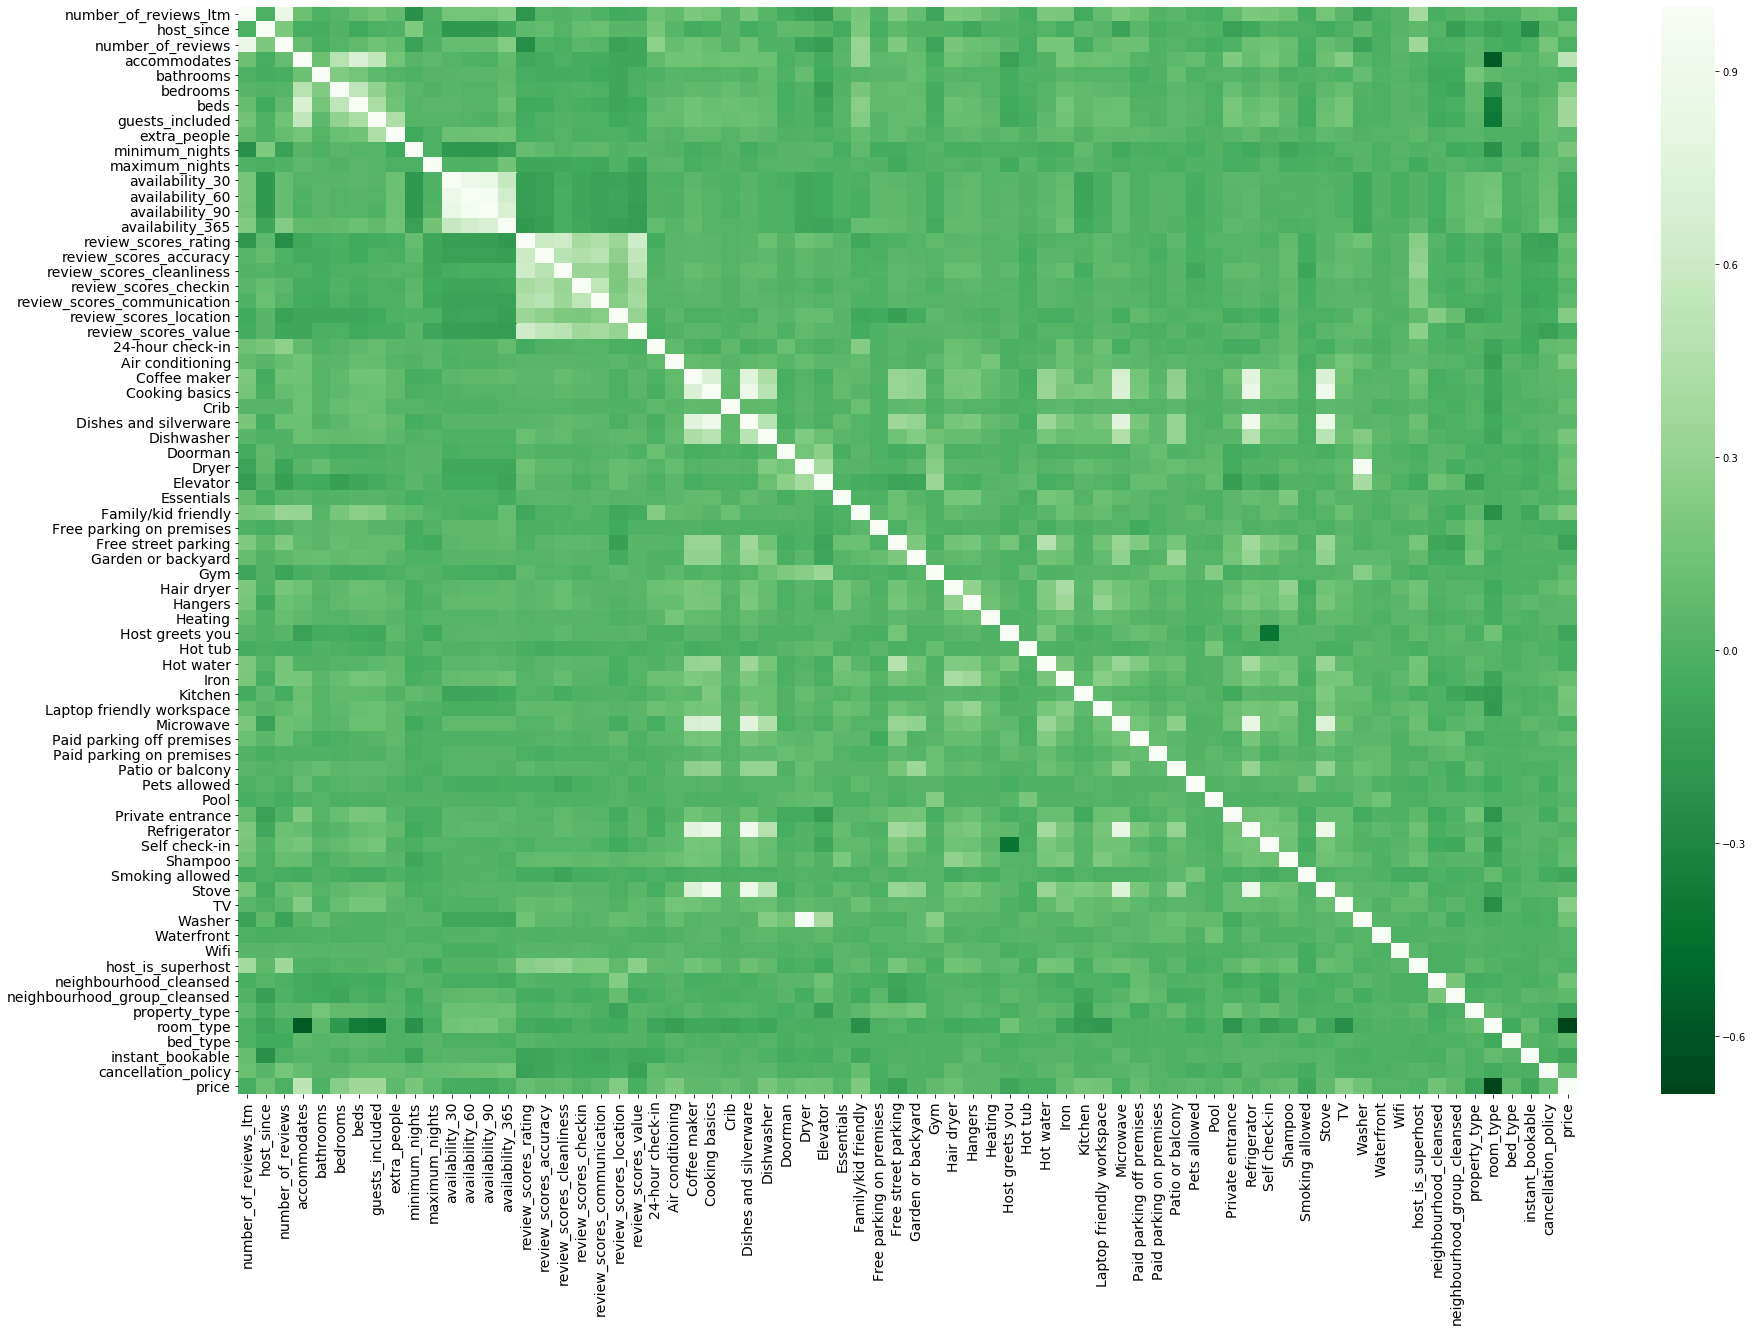

In [279]:
# Spearman Correlation Matrix
# Create spearman dataframe
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
spearman_df = listings_explore.loc[:,listings_explore.columns]
spearman_df.dropna(axis=0,inplace=True)
spearman_df[cat_attribs] = OrdinalEncoder().fit_transform(spearman_df[cat_attribs])
# Create spearman columns
spearman_cols = []
spearman_cols.extend(disc_attribs)
spearman_cols.extend(amen_attribs)
spearman_cols.extend(cat_attribs)
spearman_cols.append('price')
# Create heatmap
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(spearman_df[spearman_cols].corr(method='spearman'), cmap='Greens_r', ax=ax)
ax.tick_params(labelsize=14)

Based on feature correlations, we will remove features with high multicollinearity.

In [280]:
# Drop highly correlated features
corr_drop = ['number_of_reviews_ltm', # keep number_of_reviews (higher corr with price)
             'availability_60', 'availability_90', # keep availability_30,
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value', # keep rating and location
             'Dishes and silverware', 'Coffee maker', 'Refrigerator', 'Microwave', 'Stove', # keep cooking_basics
             'Dryer', # keep washer
            ]

In [281]:
# DataFrame of our columns by attribute type
col_df = pd.DataFrame({'Numerical': pd.Series(num_attribs),
              'Discrete:': pd.Series(disc_attribs),
              'Categorical': pd.Series(cat_attribs),
              'Amenities': pd.Series(amen_attribs)}).fillna('')
# Dataframe of features highly correlated with price
corr_df = pd.DataFrame({'numerical': pd.Series(['longitude', 'cleaning_fee', 'reviews_per_month']),
                        'discrete': pd.Series(['host_since', 'host_listings_count', 'accommodates', 'bedrooms', 'beds', 'guests_included',
                                     'minimum_nights', 'review_scores_location']),
                        'categorical': pd.Series(['instant_bookable', 'Free parking on premises', 'Free street parking',
                                        'Host greets you', 'Hot water', 'Smoking allowed'])}).fillna('')

In [282]:
# List of features highly correlated with price
highly_correlated = ['host_since', # discrete
                     'host_listings_count', # discrete
                     'longitude', # numerical
                     'accommodates', # discrete
                     'bedrooms', # discrete
                     'beds', # discrete
                     'cleaning_fee', # numerical
                     'guests_included', # discrete
                     'minimum_nights', # discrete
                     'review_scores_location', # discrete
                     'instant_bookable', # categorical
                     'reviews_per_month', # numerical
                     'Free parking on premises', # categorical
                     'Free street parking', # # categorical
                     'Host greets you', # categorical
                     'Hot water', # categorical
                     'Smoking allowed', # categorical
                     'TV', # categorical
                    ]

# Missing Value Imputation (for exploration of data)
This missing value imputation using Pandas is for the multi-variate analysis below, but the true missing value imputations are performed later in our Scikit-Learn Pipeline and ColumnTransformer (with the same mean/mode strategy).

In [283]:
# Impute missing values
listings_explore.fillna(listings_explore[num_attribs].mean(), inplace=True) # mean for numerical
listings_explore.fillna(listings_explore[disc_attribs].mode().iloc[0], inplace=True) # mode
listings_explore.fillna(listings_explore[cat_attribs].mode().iloc[0], inplace=True) # mode
listings_explore.fillna(listings_explore[amen_attribs].mode().iloc[0], inplace=True) # mode

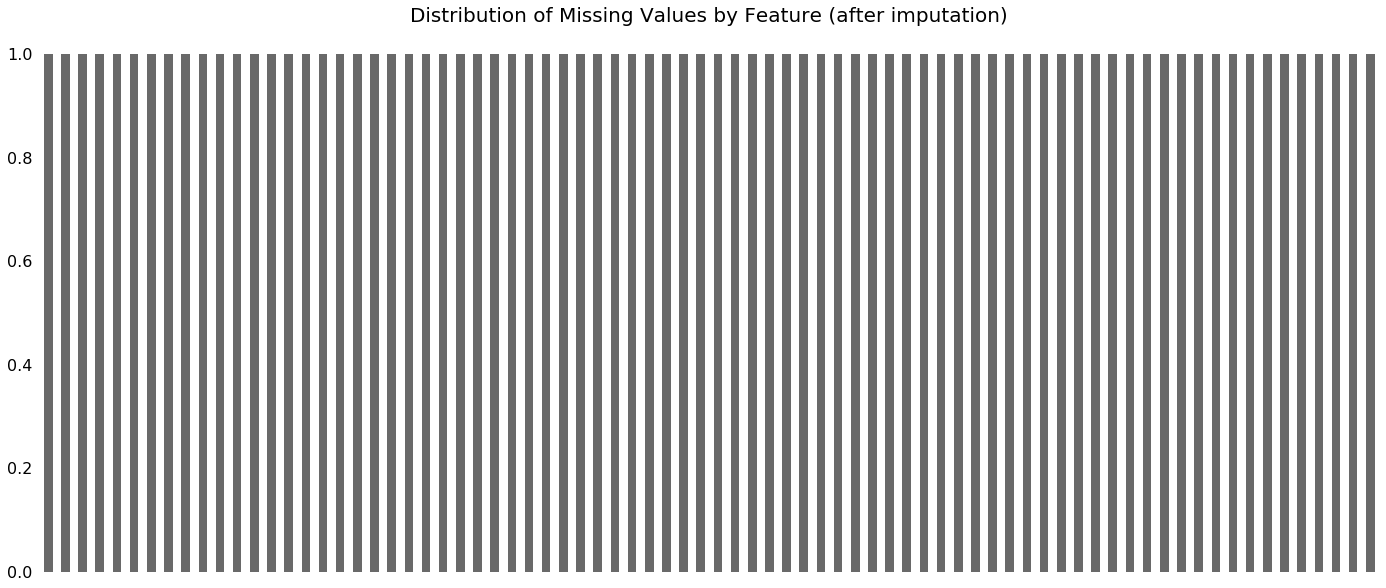

In [284]:
# Confirm missing values imputed
missingno.bar(listings_explore)
plt.title('Distribution of Missing Values by Feature (after imputation)', fontsize=20)
plt.show()

# Statistical Analysis of Numerical Features

In [285]:
# Function to plot pearsonr and p-value for regplots
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

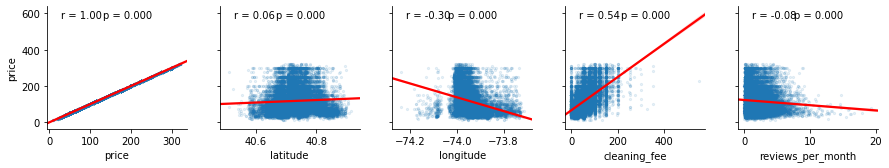

In [286]:
# Regplot numerical features
fig = sns.pairplot(x_vars = num_attribs, y_vars='price', data=listings_explore, kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's': 5}})
fig.map(corrfunc)
plt.show()

Cleaning fee positively correlates highest with price--cleaning fees increase with price. This makes sense, as higher prices would proportionately command higher cleaning fees.

In [287]:
# Create dictionary of value counts for listings_explore for chisquare goodness of fit tests
listings_dict={}
for col in listings_explore.columns:
    listings_dict[col] = listings_explore[col].value_counts()

In [288]:
# chi-square neighbourhood_cleansed
chi, p = scipy.stats.chisquare(listings_dict['neighbourhood_cleansed'])
print(chi, p)

111251.18406821963 0.0


In [289]:
# chi-square neighbourhood_group_cleansed
chi, p = scipy.stats.chisquare(listings_dict['neighbourhood_group_cleansed'])
print(chi, p)

15215.532237936772 0.0


In [290]:
# chi-square property_type
chi, p = scipy.stats.chisquare(listings_dict['property_type'])
print(chi, p)

144618.14871048252 0.0


In [291]:
# chi-square room_type
chi, p = scipy.stats.chisquare(listings_dict['room_type'])
print(chi, p)

8282.945819467554 0.0


In [292]:
# chi-square bed_type
chi, p = scipy.stats.chisquare(listings_dict['bed_type'])
print(chi, p)

73880.40744592347 0.0


# Multi-Variate Analysis

For our multi-variate analysis, we will think about the important questions we are looking to answer with this data. Our focus is on business intelligence that will help Airbnb gain insights into its market and drive efficiency and revenue. Specifically, our data revolves around our hosts and their property information, so we will center our questions and strategy around hosts and location with the following questions:

**1. Which hosts generate the most revenue?**


**2. Which locations generate the most revenue?**


**3. Do listings with higher ratings generate more revenue?**

# Question 1: Which hosts generate the most revenue?

### Which hosts have the most listings?

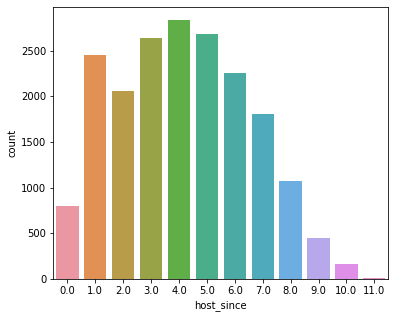

In [293]:
plt.figure(figsize=(6,5))
sns.countplot(listings_explore.host_since)
plt.show()

In [294]:
# Percentage of total listings by hosts hosting for 1-7 years
percentage_of(listings_explore.host_since, [1,2,3,4,5,6,7]).sum()

0.88

In [295]:
percentage_of(listings_explore.host_since, 4)

0.15

80% of hosts have been renting for 1-7 years.

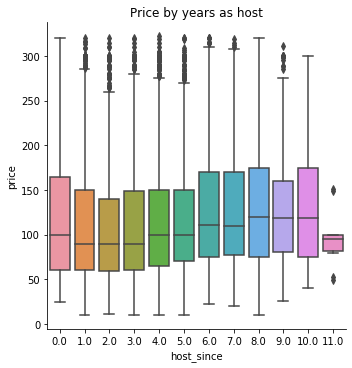

In [296]:
sns.catplot(x='host_since', y='price', data=listings_explore, kind='box', showfliers=True)
plt.title('Price by years as host')
plt.show()

Median price is rather uniform regardless of years hosting (rises slightly for hosts 6yrs+), which means our highest revenue generators by group are hosts with the highest frequencies. Therefore, hosts who have been hosting from 1-7 years generate the most revenue. However, it is important to note that our most loyal hosts who have been hosting for many years (8+) may not be as populous for acute revenue generation by frequency, but their loyalty has generated consistent revenue for many years longer than even the highest revenue-generating hosts.

Yet, we must still check the frequencies of availability.

### Which hosts have the most frequent bookings?

First, we will plot the distribution of all listings' availabilities in the past year.

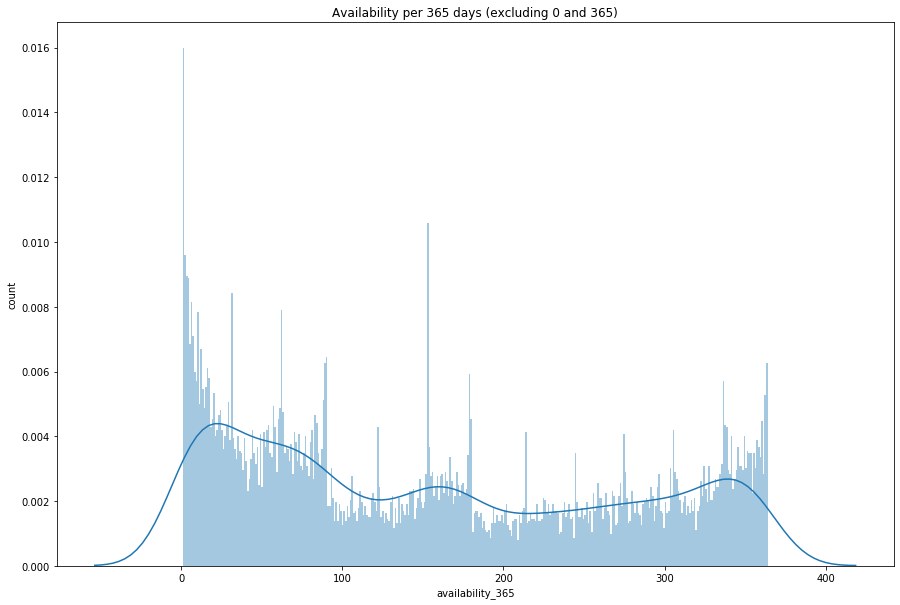

In [297]:
plt.figure(figsize=(15,10))
sns.distplot(listings_explore[(listings_explore.availability_365 > 0) & (listings_explore.availability_365 < 365)].availability_365, bins=364)
plt.xlabel('availability_365')
plt.ylabel('count')
plt.title('Availability per 365 days (excluding 0 and 365)')
plt.show()

The distribution of availabilities in the past year skews slightly right, but is still rather uniform, with the lowest values ranging from 100-325. We will now segment by host_since to confirm whether certain segments of hosts rent their listings more frequently.

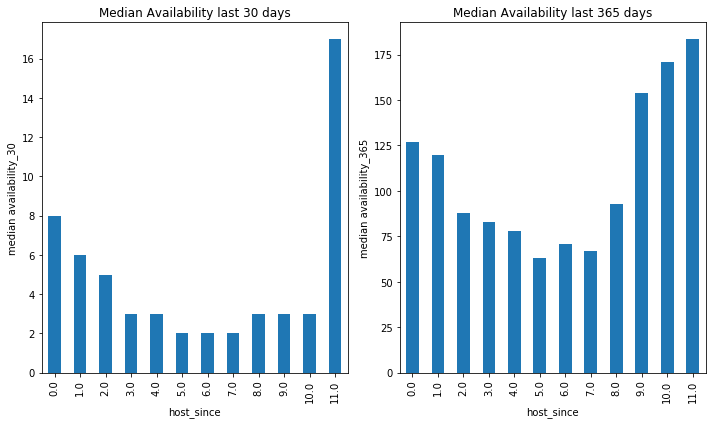

In [298]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
listings_explore.groupby('host_since').median().availability_30.plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('median availability_30')
ax[0].set_title('Median Availability last 30 days')
listings_explore.groupby('host_since').median().availability_365.plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('median availability_365')
ax[1].set_title('Median Availability last 365 days')
fig.tight_layout()
plt.show()

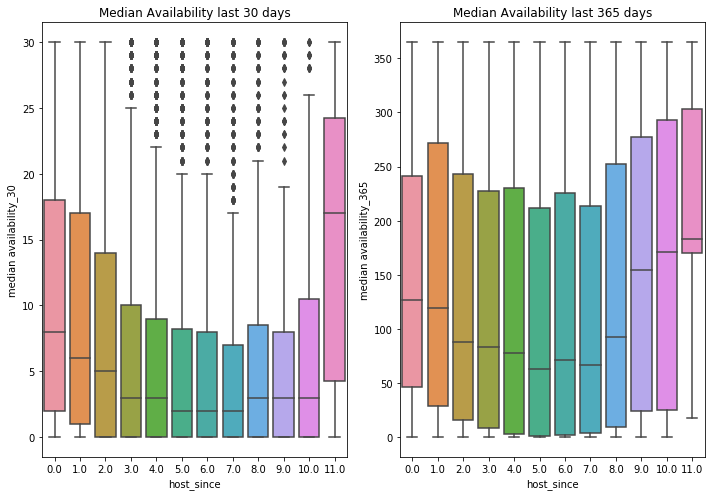

In [299]:
fig, ax = plt.subplots(1,2,figsize=(10,7))
sns.boxplot(x='host_since', y='availability_30', data=listings_explore, ax=ax[0])
ax[0].set_ylabel('median availability_30')
ax[0].set_title('Median Availability last 30 days')
sns.boxplot(x='host_since', y='availability_365', data=listings_explore, ax=ax[1])
ax[1].set_ylabel('median availability_365')
ax[1].set_title('Median Availability last 365 days')
fig.tight_layout()
plt.show()

Our largest populations of hosts by year, years 1-6, also possess the lowest vacancy rates (availability) for both the past month and past year. By median, nearly all days of the month are booked for the past month, and less than 100 days are vacant throughout the year.

This means not only are hosts hosting for 1-6 years the largest category of hosts, but they also rent the most frequently, further generating the most revenue of all host classes.

#### Superhost Status

We will now segment the hosts by superhost status to determine whether superhosts generate more revenue.

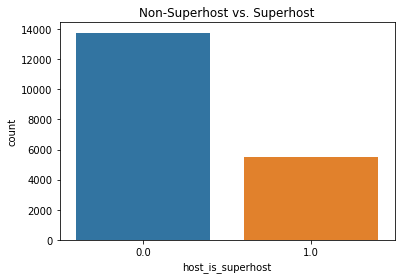

In [300]:
sns.countplot(listings_explore.host_is_superhost)
plt.title('Non-Superhost vs. Superhost')
plt.show()

In [301]:
percentage_of(listings_explore.host_is_superhost, 1)

0.29

29% of hosts are superhosts.

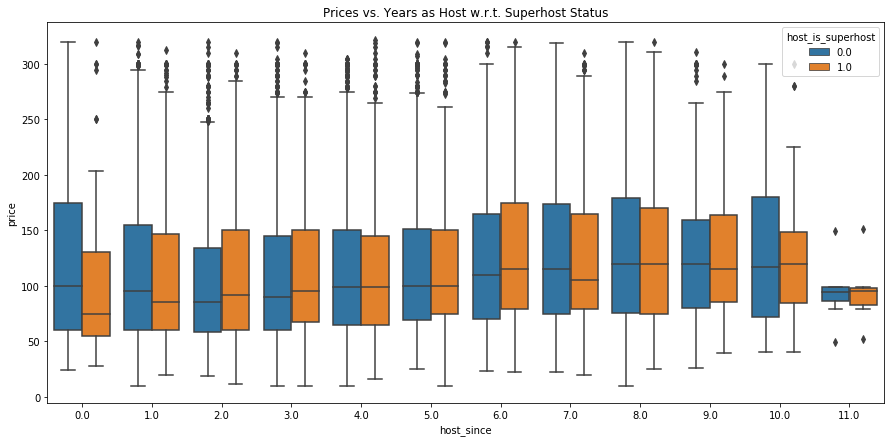

In [302]:
plt.figure(figsize=(15,7))
sns.boxplot(x='host_since', y='price', data=listings_explore,
            hue='host_is_superhost', showfliers=True)
plt.title('Prices vs. Years as Host w.r.t. Superhost Status')
plt.show()

Superhosts do not seem to command higher prices than non-superhosts.

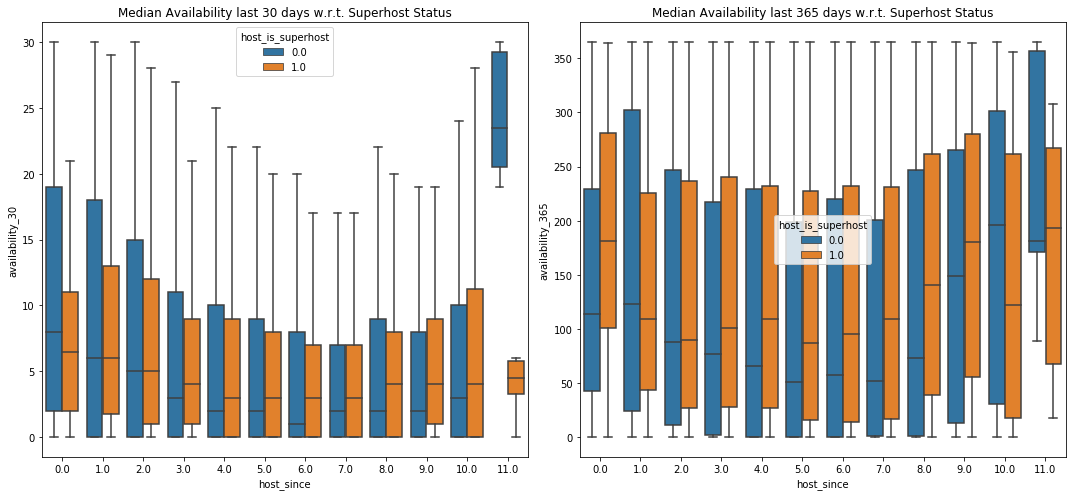

In [303]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x='host_since', y='availability_30', data=listings_explore,
            hue='host_is_superhost', showfliers=False, ax=ax[0])
ax[0].set_ylabel('availability_30')
ax[0].set_title('Median Availability last 30 days w.r.t. Superhost Status')
sns.boxplot(x='host_since', y='availability_365', data=listings_explore,
            hue='host_is_superhost', showfliers=False, ax=ax[1])
ax[1].set_ylabel('availability_365')
ax[1].set_title('Median Availability last 365 days w.r.t. Superhost Status')
fig.tight_layout()
plt.show()

What sets apart a superhost is not their higher prices but their higher rates of renting, as based on their low availabilities.

Moving forward, we would need more datapoints to determine the ratios of days the listings are actually available versus the days rented because hosts may not make their listing available every night of the month/year. But with the information we currently have, it seems there is no significant difference between superhosts and non-superhosts when it comes to median prices and frequency of rents.

### Which hosts' room types generate the most revenue?

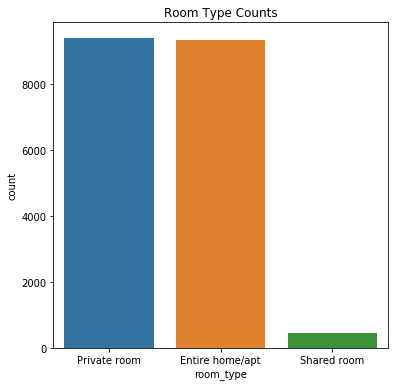

In [304]:
plt.figure(figsize=(6,6))
sns.countplot(listings_explore.room_type)
plt.title('Room Type Counts')
plt.show()

49% are Private room, 49% are Entire home/apartment, and only 2% is Shared room.

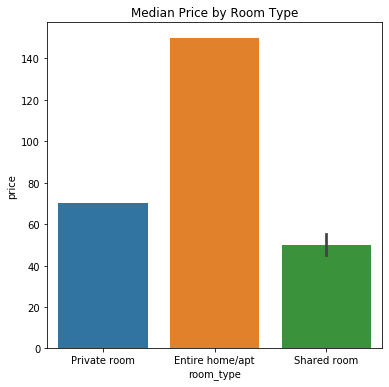

In [305]:
plt.figure(figsize=(6,6))
sns.barplot(x='room_type', y='price', data=listings_explore[listings_explore.host_listings_count < 10], ci=95, estimator=median)
plt.title('Median Price by Room Type')
plt.show()

Entire home/apartment generates by far the most revenue with 49% of all listings and a median price of 150--more than double the median price of Private room. Private room generates the 2nd-most revenue by room-type with the same 49% ratio share of all listings, but only about 70 median price. Shared room generates the least revenue with the lowest median price of about $50 and it only accounts for 2% of all listings.

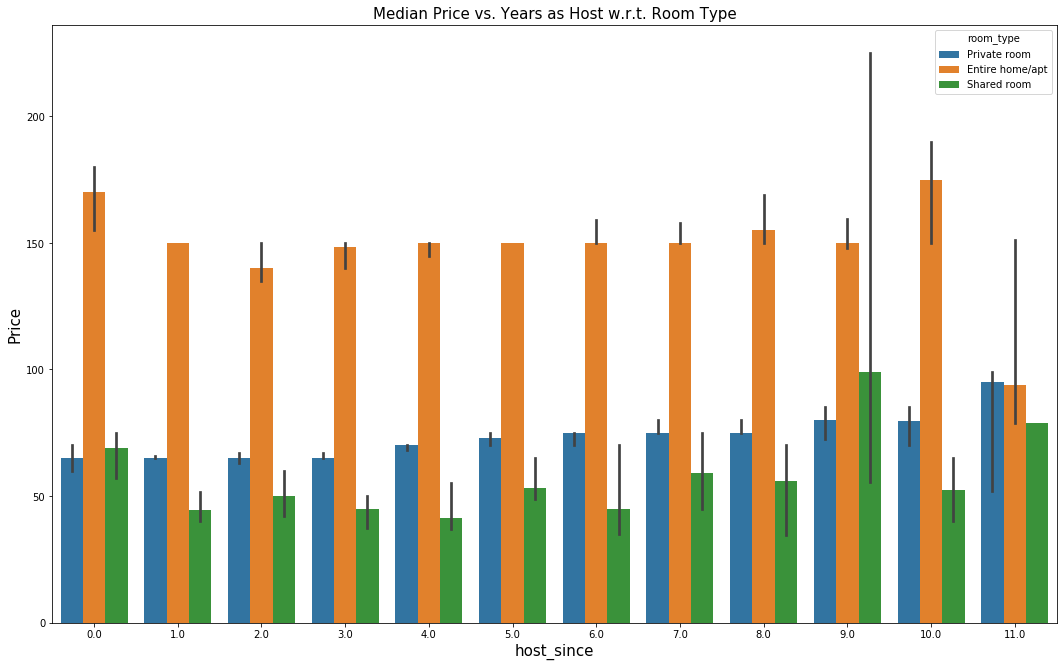

In [306]:
plt.figure(figsize=(18,11))
sns.barplot(x='host_since', y='price', hue='room_type', data=listings_explore[listings_explore.host_listings_count < 10], ci=95, estimator=median)#, ci=95)#, showfliers=False)
plt.title('Median Price vs. Years as Host w.r.t. Room Type', fontsize=15)
plt.xlabel('host_since', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

Price is relatively uniform across all host_since segments, meaning that entire home/apartment hosts who have been hosting for 1-7 years generate the most revenue, followed by private room hosts hosting 1-7 years.

### Which hosts have the most listings?

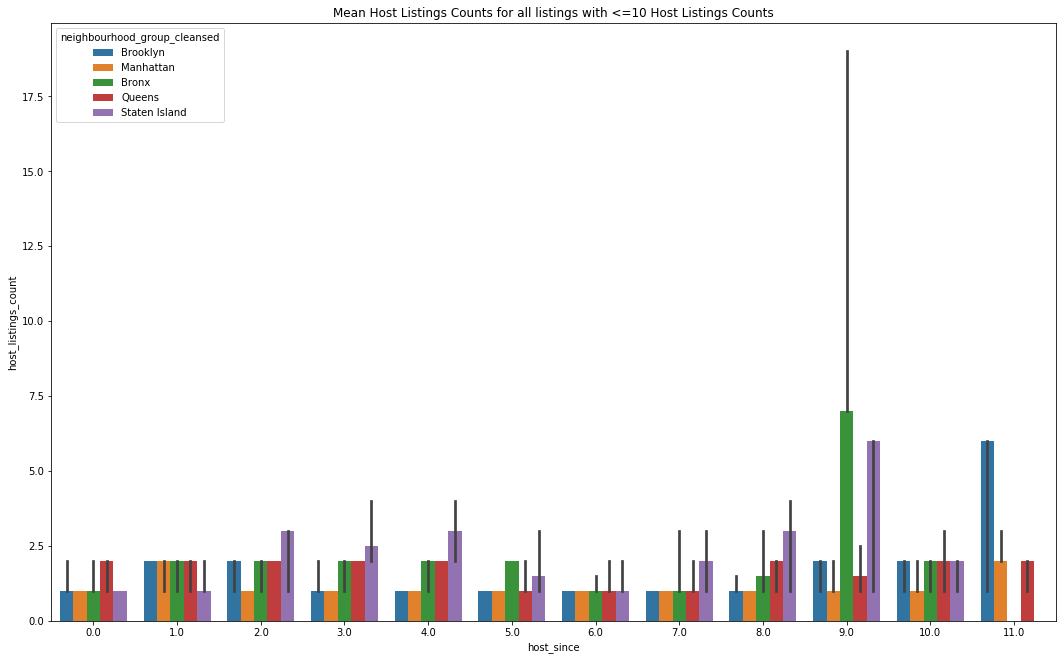

In [307]:
plt.figure(figsize=(18,11))
sns.barplot(x='host_since', y='host_listings_count', hue='neighbourhood_group_cleansed', data=listings_explore, ci=95, estimator=median)#, estimator=mean)#, ci=95)#, showfliers=False)
plt.title('Mean Host Listings Counts for all listings with <=10 Host Listings Counts')
plt.show()

No one host segment seems to have significantly more listings than any other host segment, so we will simply conclude that individual hosts with higher listings counts generate more revenue.

# Question 2: Which locations generate the most revenue? Which locations have the most potential for future growth?

### Which Boroughs generate the most revenue?

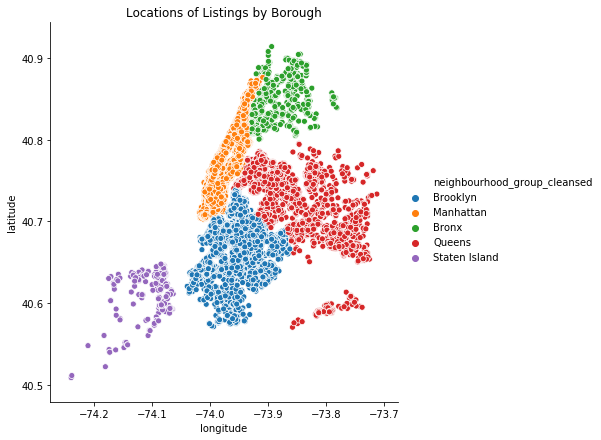

In [308]:
sns.relplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed',
            data=listings_explore, height=6, aspect=1)
plt.title('Locations of Listings by Borough')
plt.show()

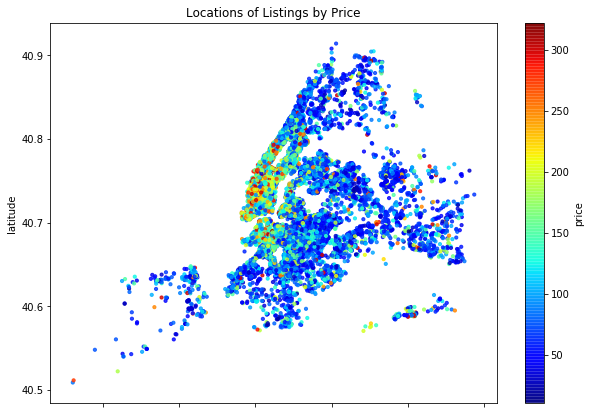

In [309]:
listings_explore.plot(kind='scatter', x="longitude", y="latitude", alpha=0.8,
                            figsize=(10,7), c='price', cmap=plt.get_cmap("jet"),
                            colorbar=True, s=10)
plt.title('Locations of Listings by Price')
plt.show()

Manhattan and northern Brooklyn have significantly higher prices than other boroughs (the lowest Manhattan prices are in the far Upper West Side nearing the Bronx). Prices also seem to rise near bodies of water.

Note that business districts like Mid-City and Wall Street are not only tourist hubs but can also be for Airbnb business trips at these higher price-ranges.

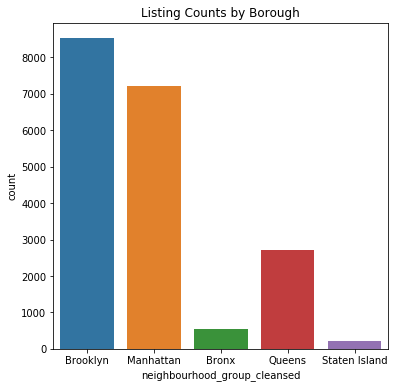

In [310]:
plt.figure(figsize=(6,6))
sns.countplot(listings_explore.neighbourhood_group_cleansed)
plt.title('Listing Counts by Borough')
plt.show()

In [311]:
listings_explore.groupby('neighbourhood_group_cleansed').count().price

neighbourhood_group_cleansed
Bronx             551
Brooklyn         8527
Manhattan        7212
Queens           2725
Staten Island     217
Name: price, dtype: int64

Brooklyn is the largest borough by listings with 8527 listings, followed by Manhattan with 7212, Queens has 2725, Staten Island has 217.

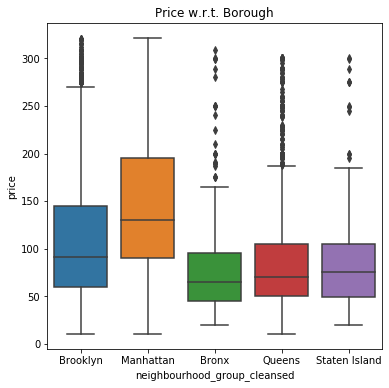

In [312]:
plt.figure(figsize=(6,6))
sns.boxplot(x='neighbourhood_group_cleansed', y='price',
            data=listings_explore)
plt.title('Price w.r.t. Borough')
plt.show()

In [313]:
# Median Price by Borough
listings_explore.groupby('neighbourhood_group_cleansed').median().price

neighbourhood_group_cleansed
Bronx             65.0
Brooklyn          91.0
Manhattan        130.0
Queens            70.0
Staten Island     75.0
Name: price, dtype: float64

Manhattan commands the highest median prices at 130, with Brooklyn in 2nd at 91 (Brooklyn's upper range likely comes from northern Brooklyn. Brooklyn is large and the outskirts are not as tourist-centered as Manhattan). Bronx, Queens, and Staten Island have the lowest median prices at 65, 70, and 75 respectively.

### Which Borough's room types generate the most revenue?

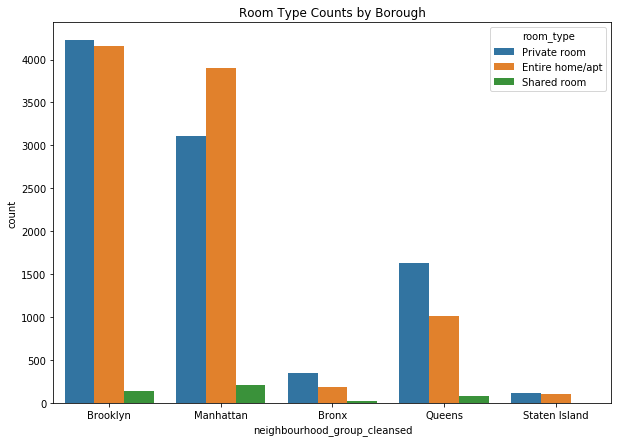

In [314]:
plt.figure(figsize=(10,7))
sns.countplot(listings_explore.neighbourhood_group_cleansed, hue=listings_explore.room_type)
plt.title('Room Type Counts by Borough')
plt.show()

Private rooms and entire homes are by far the most common room types, at about equal frequencies. Shared rooms have very low counts in comparison.


Brooklyn has a higher ratio of private rooms, while Manhattan has a higher ratio of entire homes/apartments. Just based on local knowledge, this is likely because more Manhattan hosts have a place to themselves, while Brooklyn hosts tend to have more roommates. This would be one reason that Manhattan's median prices are higher than Brooklyn's, along with property values in general being higher in Manhattan, since entire homes/apartments rent for  higher prices than private rooms. Queens has more private rooms than entire homes/apartments.

### Which neighborhoods generate the most revenue?

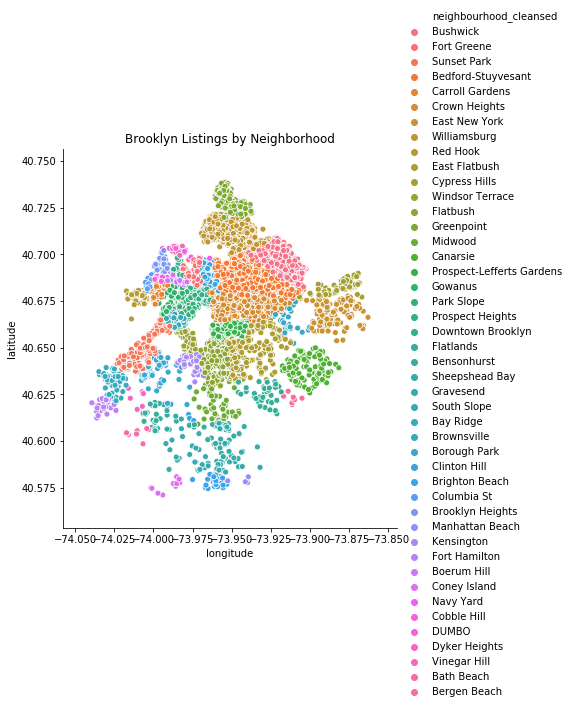

In [315]:
sns.relplot(x='longitude', y='latitude', hue='neighbourhood_cleansed',
            data=listings_explore[listings_explore.neighbourhood_group_cleansed=='Brooklyn'], height=6, aspect=1)#, legend=False)
plt.title('Brooklyn Listings by Neighborhood')
plt.show()

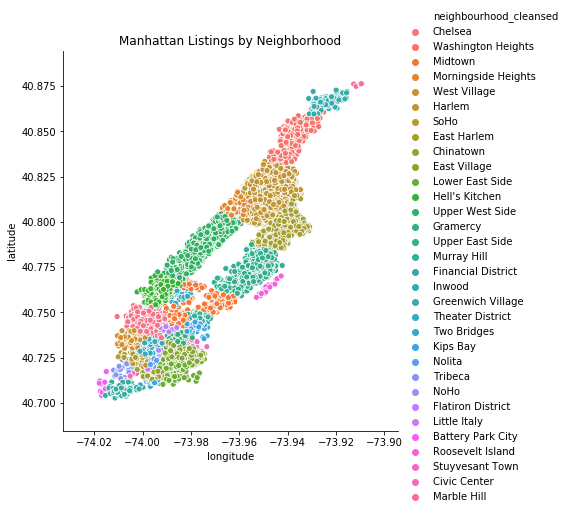

In [316]:
sns.relplot(x='longitude', y='latitude', hue='neighbourhood_cleansed',
            data=listings_explore[listings_explore.neighbourhood_group_cleansed=='Manhattan'], height=6, aspect=1)#, legend=False)
plt.title('Manhattan Listings by Neighborhood')
plt.show()

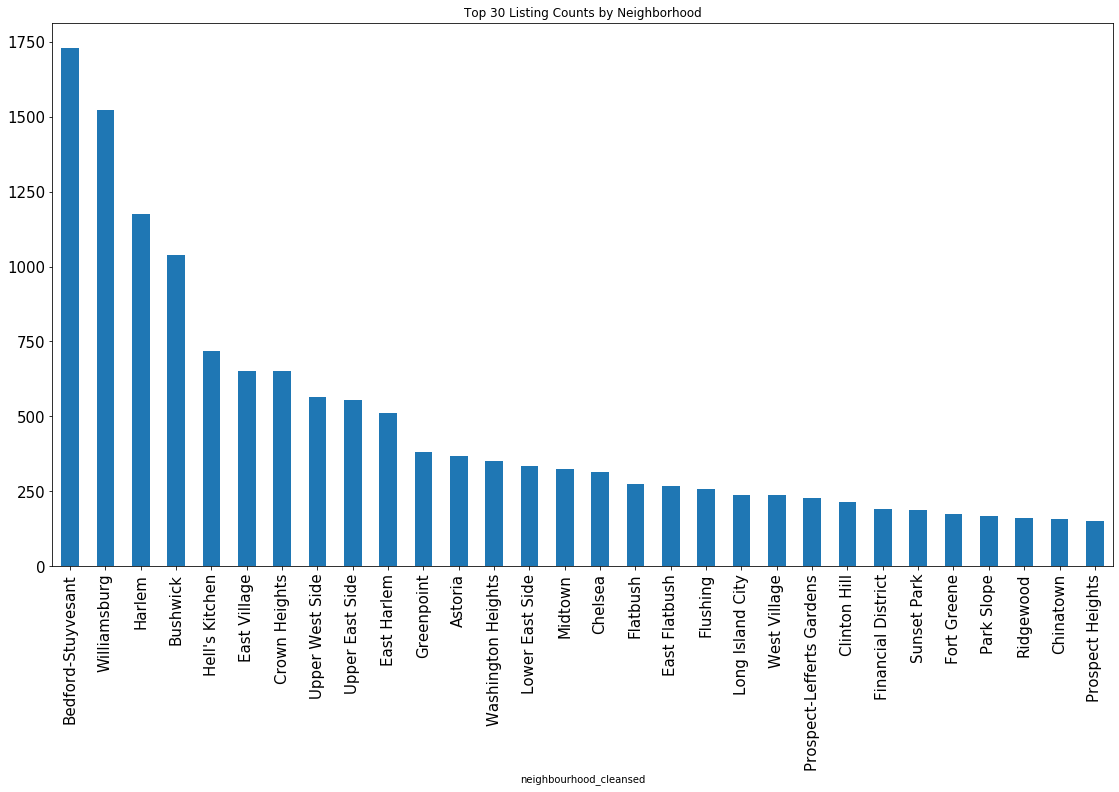

In [317]:
plt.figure(figsize=(19,10))
listings_explore.groupby('neighbourhood_cleansed').count().price.sort_values(ascending=False)[:30].plot(kind='bar')
plt.title('Top 30 Listing Counts by Neighborhood')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The top 30 neighborhoods by listing count come primarily from Brooklyn and Manhattan, ranging from about 200 listings to 1750 listings. The top 4 neighborhoods by listing count are Bedford-Stuyvesant, Williamsburg, Harlem, and Bushwick.

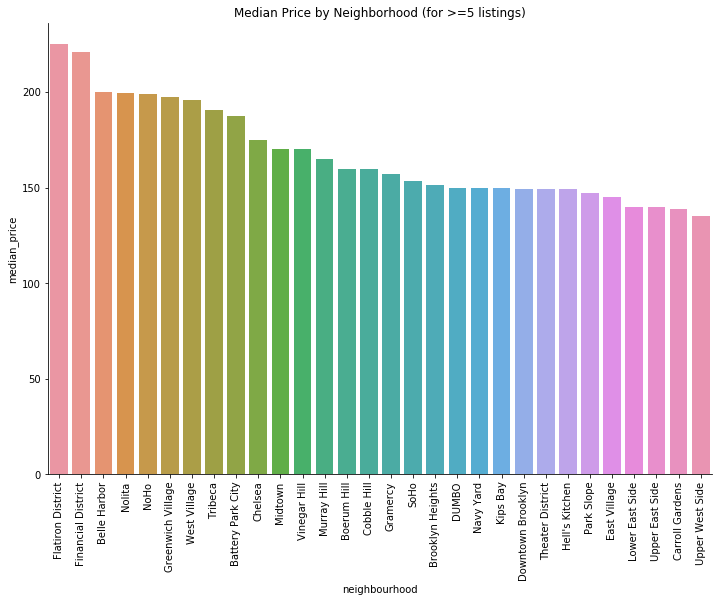

In [318]:
# Create dataframe of neighborhoods and their median prices (for >=5 listings)

neighbourhoods_medians = []
neighbourhoods_names = []

for neighbourhood in listings_explore.neighbourhood_cleansed.unique():
    #print('{} Prices:\n'.format(neighbourhood))
    if len(listings_explore[listings_explore.neighbourhood_cleansed == neighbourhood]) >= 5:
        neighbourhoods_medians.append(listings_explore[listings_explore.neighbourhood_cleansed == neighbourhood].price.median())
        neighbourhoods_names.append(str(neighbourhood))

nbh_medians = pd.DataFrame({'neighbourhood': neighbourhoods_names, 'median_price': neighbourhoods_medians})
nbh_medians.sort_values(by=['median_price'], ascending=False, inplace=True)

# Top 10 and bottom 10 median prices (for neighborhoods with >=5 total listings)
#sns.set(font_scale=1.5, )
fig = sns.catplot(x='neighbourhood', y='median_price', data=nbh_medians.iloc[pd.np.r_[0:30]],#, -19:-1, -1]],
                  kind='bar', height=7, aspect=1.5)
fig.set_xticklabels(rotation=90)
plt.title('Median Price by Neighborhood (for >=5 listings)')
plt.show()

It is not surprising that the neighborhoods with the highest median listing prices come primarily from Manhattan and Brooklyn. The top 10 neighborhoods for rents are Fashion District, Financial District, Belle Harbor, Nolita, NoHo, Greenwich Village, West Village, Tribeca, Battery Park City, and Chelsea. Belle Harbor is the one exception to the top 10 as it is in Queens--but it is quite a rare location on the water.

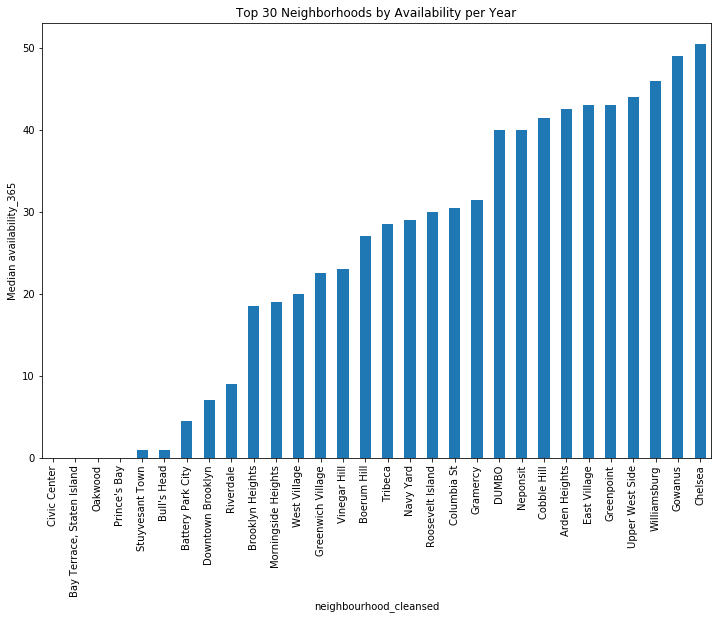

In [319]:
listings_explore.groupby(['neighbourhood_cleansed']).median().availability_365.sort_values(ascending=True)[:30].plot(kind='bar', figsize=(12,8))
plt.title('Top 30 Neighborhoods by Availability per Year')
plt.ylabel('Median availability_365')
plt.show()

Many of the top 30 highest median priced listings are also in the top 30 lowest availabilities per year, and as with median price, most of these listings with low availabilities are in Manhattan and Brooklyn.

Namely, the neighborhoods generating the most revenue have the highest median price, lowest median availabilities, and high listings counts:

Brooklyn: Downtown Brooklyn, Brooklyn Heights, DUMBO, Bedford-Stuyvesant, Bushwick, Williamsburg.

Manhattan: East Village, West Village, Greenwich Village,  Tribeca, Chelsea, Harlem, Upper West Side.

Queens: Astoria, Flushing, Long Island City.

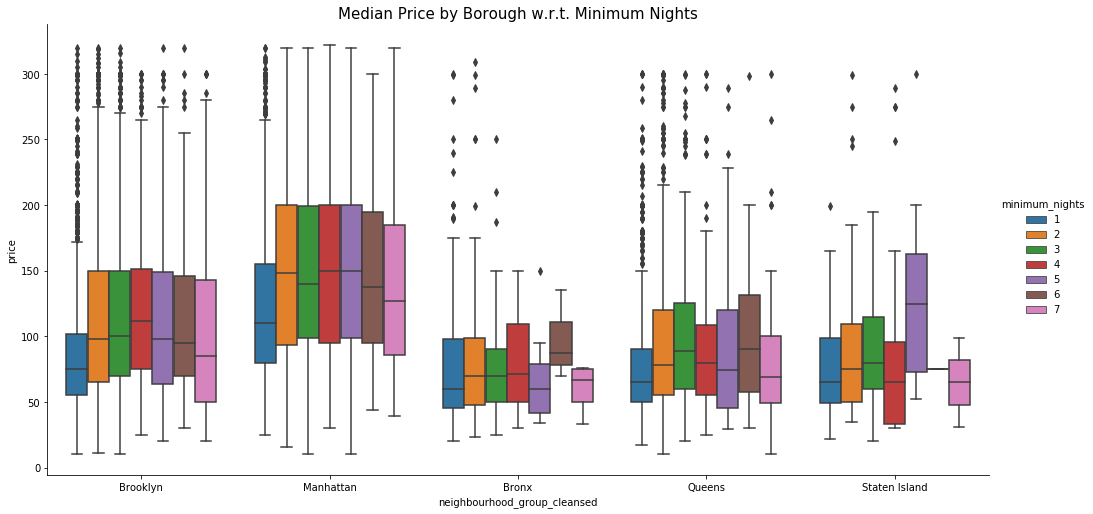

In [320]:
sns.catplot(x='neighbourhood_group_cleansed', y='price',
            data=listings_explore, kind='box',
            hue='minimum_nights', height=7, aspect=2)
plt.title('Median Price by Borough w.r.t. Minimum Nights', fontsize=15)
plt.show()

For Brooklyn and Manhattan, the highest median prices are for minimum nights of 2-6.

### Importing Census Data

In order to draw further insights on location, we will pool NYC borough data from census.gov (2017): (https://www.census.gov/quickfacts/fact/table/newyorkcountymanhattanboroughnewyork,bronxcountybronxboroughnewyork,queenscountyqueensboroughnewyork,kingscountybrooklynboroughnewyork,richmondcountystatenislandboroughnewyork,newyorkcitynewyork#) (https://www.baruch.cuny.edu/nycdata/income-taxes/hhold_income-numbers.htm)

### How do demographics affect revenue by borough?

In [321]:
# Create dataframe of NYC stats
nyc_stats = pd.DataFrame(data={'Brooklyn': [944650, 52782], 'Manhattan': [758345, 79781], 'Bronx': [495356, 36593], 'Queens': [777904, 62008], 'Staten_Island': [166150, 76244]},
             index=['households', 'median_household_income'])
nyc_stats = nyc_stats.append(pd.DataFrame(data=
            {'Brooklyn': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Brooklyn'])],
            'Manhattan': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Manhattan'])],
            'Bronx': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Bronx'])],
            'Queens': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Queens'])],
            'Staten_Island': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Staten Island'])]},
            index=['total_listings']))
nyc_stats.loc['households_per_listing'] = (nyc_stats.loc['households'].values / nyc_stats.loc['total_listings'])
nyc_stats = nyc_stats.append(pd.DataFrame(data=
            {'Brooklyn': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Brooklyn'].price.median()],
            'Manhattan': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Manhattan'].price.median()],
            'Bronx': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Bronx'].price.median()],
            'Queens': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Queens'].price.median()],
            'Staten_Island': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Staten Island'].price.median()]},
            index=['median_listing_price']))
nyc_stats = nyc_stats.append(pd.DataFrame(data=
            {'Brooklyn': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Brooklyn'].price.sum()],
            'Manhattan': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Manhattan'].price.sum()],
            'Bronx': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Bronx'].price.sum()],
            'Queens': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Queens'].price.sum()],
            'Staten_Island': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Staten Island'].price.sum()]},
            index=['total_revenue']))

nyc_stats = nyc_stats.round(0).astype('int').T
nyc_stats['Borough'] = ['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island']
cols = nyc_stats.columns.tolist()
cols = [cols[-1]] + cols[:-1]
nyc_stats = nyc_stats[cols]

In [322]:
nyc_stats

,Borough,households,median_household_income,total_listings,households_per_listing,median_listing_price,total_revenue
Brooklyn,Brooklyn,944650,52782,8527,111,91,918807
Manhattan,Manhattan,758345,79781,7212,105,130,1041371
Bronx,Bronx,495356,36593,551,899,65,42506
Queens,Queens,777904,62008,2725,285,70,240647
Staten_Island,Staten Island,166150,76244,217,766,75,18769


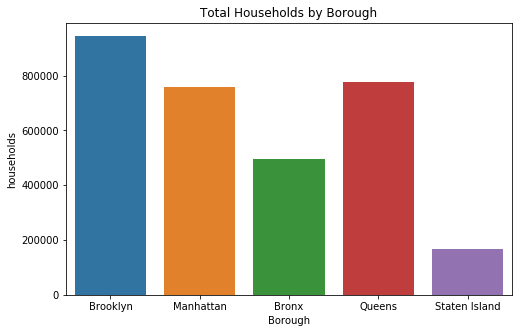

In [323]:
plt.figure(figsize=(8,5))
sns.barplot(x='Borough', y='households', data=nyc_stats)
plt.title('Total Households by Borough')
plt.show()

In [324]:
nyc_stats['households']

Brooklyn         944650
Manhattan        758345
Bronx            495356
Queens           777904
Staten_Island    166150
Name: households, dtype: int64

Brooklyn has the most households by borough with 944,000. Interestingly, Queens has the 2nd-most households with 778,000, followed closely by Manhattan with 758,000. Queens is an area for growth since it has a semi-strong presence on Airbnb, but plenty of room to expand. However, because it is more suburban, many potential listings are likely family homes that are not very often available for rent--and tourists are not as keen to rent in suburban areas far from the city center.

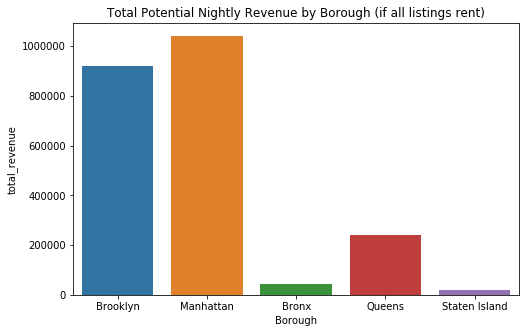

In [325]:
plt.figure(figsize=(8,5))
sns.barplot(x='Borough', y='total_revenue', data=nyc_stats)
plt.title('Total Potential Nightly Revenue by Borough (if all listings rent)')
plt.show()

Manhattan has the highest potential revenues based on our current listings data, followed closely by Brooklyn. Despite Brooklyn's higher listings count, Manhattan's higher prices has propelled it to the top.

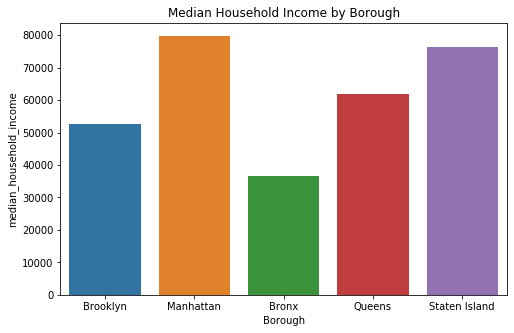

In [326]:
plt.figure(figsize=(8,5))
sns.barplot(x='Borough', y='median_household_income', data=nyc_stats)
plt.title('Median Household Income by Borough')
plt.show()

This chart's analysis is below, combined with household income by borough analysis.

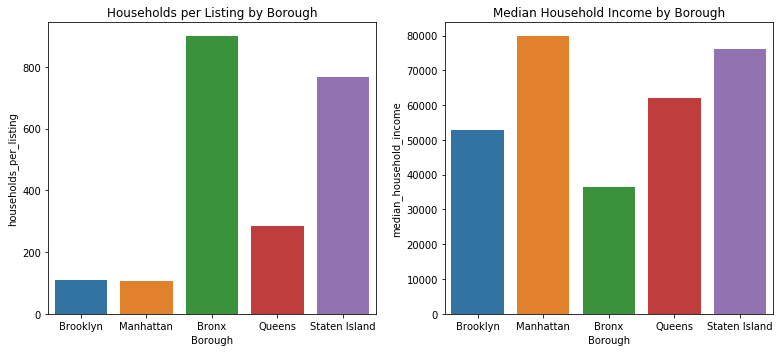

In [327]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
sns.barplot(x='Borough', y='households_per_listing', data=nyc_stats, ax=ax[0])
ax[0].set_title('Households per Listing by Borough')
sns.barplot(x='Borough', y='median_household_income', data=nyc_stats, ax=ax[1])
ax[1].set_title('Median Household Income by Borough')
plt.tight_layout()
plt.show()

Brooklyn and Manhattan have about 150 households per listing, which still leaves growth for more listings, although the ratio is quite small. Bronx and Staten Island have the most room for growth with more than 750 households per listing each. Queens has about 325 households per listing, about double that of Brooklyn and Manhattan.

Bronx likely has such a high ratio because of its lower median incomes deterring potential guests from the area. Staten Island's median income at 76,000 almost compares to that of Manhattan at 79,000. For how many listings Brooklyn has, it has the 2nd lowest median income at 53,000. Queens comes in 3rd at 62,000.

Brooklyn's lower median income but higher listings ratios is likely explained by its neighborhoods. Northern Brooklyn's prices almost compare to that of Manhattan, while the rest are much lower, and are much further from the city center.

# Question 3: Do listings with higher ratings generate more revenue?

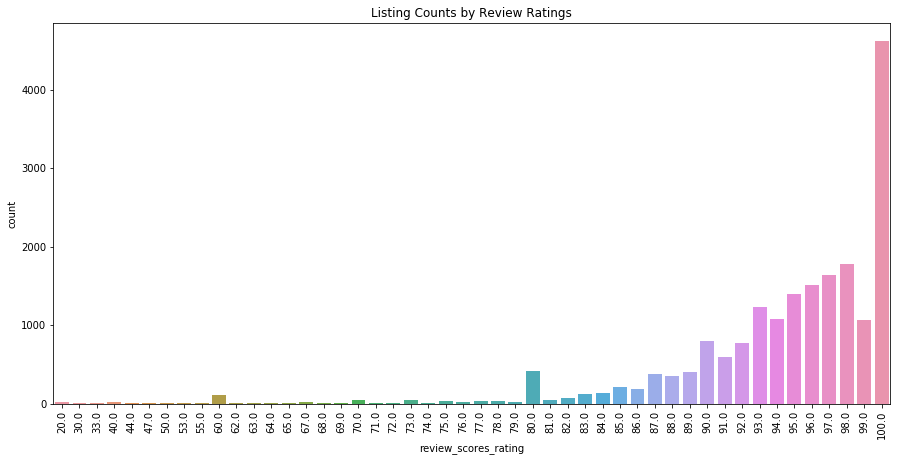

In [328]:
plt.figure(figsize=(15,7))
ax = sns.countplot(listings_explore.review_scores_rating.round(0))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Listing Counts by Review Ratings')
plt.show()

The listings with higher review ratings, namely in the 80s, 90s, and 100, are by far the most common listings by count.

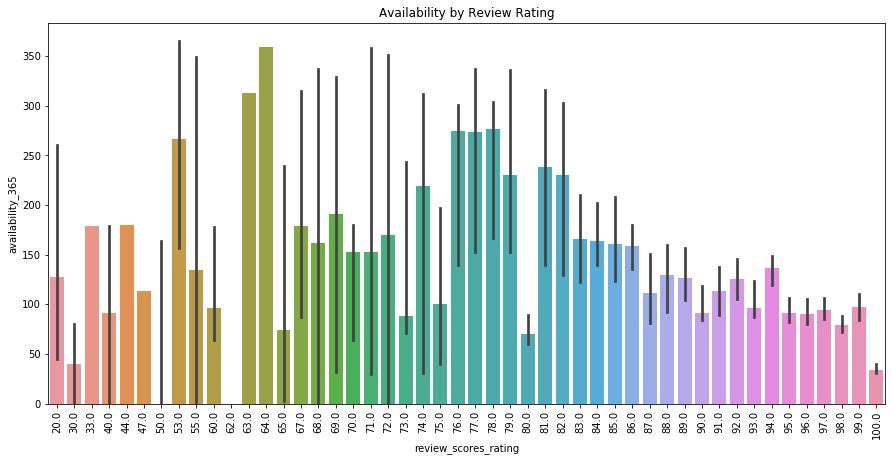

In [329]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=listings_explore.review_scores_rating.round(0), y=listings_explore.availability_365, estimator=median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Availability by Review Rating')
plt.show()

Listings with higher ratings tend to have lower median availability per year. If we can determine that listings with higher ratings also tend to have higher median prices, we can conclude that listings with higher ratings generate more total revenue.

In [330]:
# Percentage of listings with score >= 90
100 - percentile(listings_explore.review_scores_rating, 89)

86.74344841930116

Nearly 90% of listings have review score ratings of 90 or above.

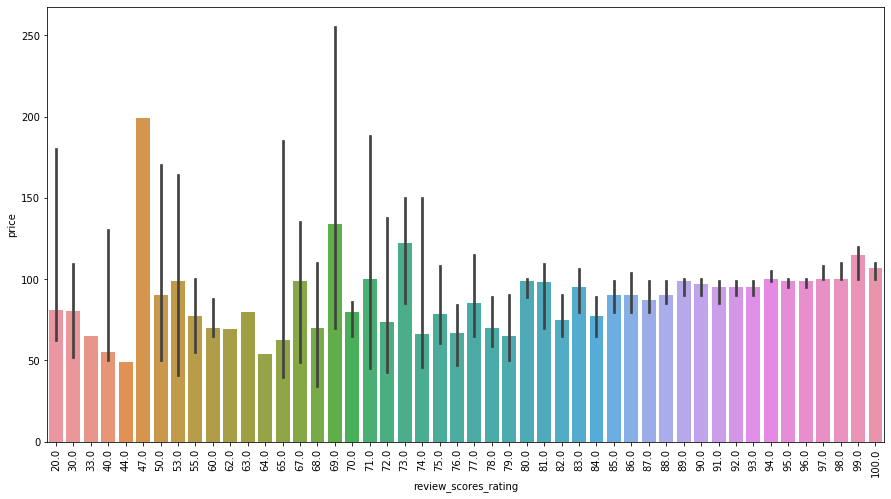

In [331]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='review_scores_rating', y='price',# hue='neighbourhood_group_cleansed',
                 data=listings_explore, estimator=median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Prices are slightly higher and more stable for listings rated above 90, but once scores surpass 90, prices remain rather uniform from 90-100 (increasing very slightly as ratings increase). Because almost 90% of listings are rated at 90% or above, this means that listings with higher ratings generate more revenue due to both their higher frequency and higher median prices.

Listings rated below 90% are much more rare in frequency, and median prices vary much more, but are generally lower than the listings rated 91-100.

### Do superhosts have higher ratings than non-superhosts?

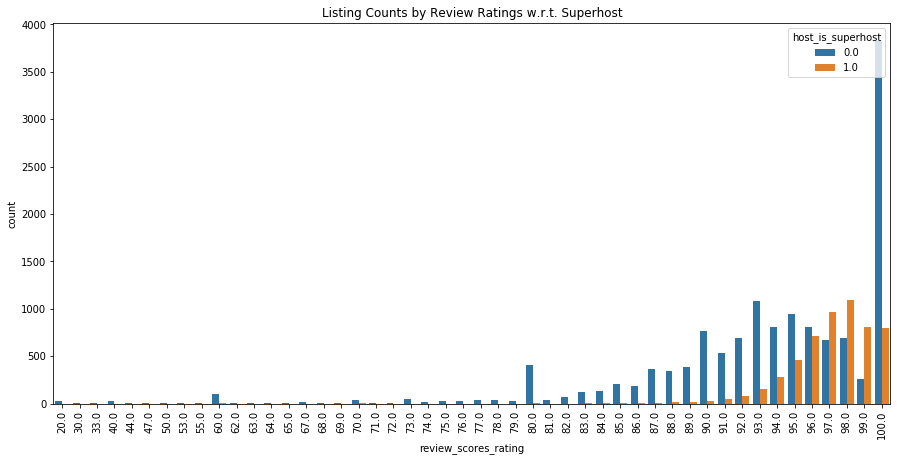

In [332]:
plt.figure(figsize=(15,7))
ax = sns.countplot(listings_explore.review_scores_rating.round(0), hue=listings_explore.host_is_superhost)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Listing Counts by Review Ratings w.r.t. Superhost')
plt.show()

As review score ratings increase, the ratio of superhosts to non-superhosts increases as well. Nearly all superhosts have above 90% review score ratings.

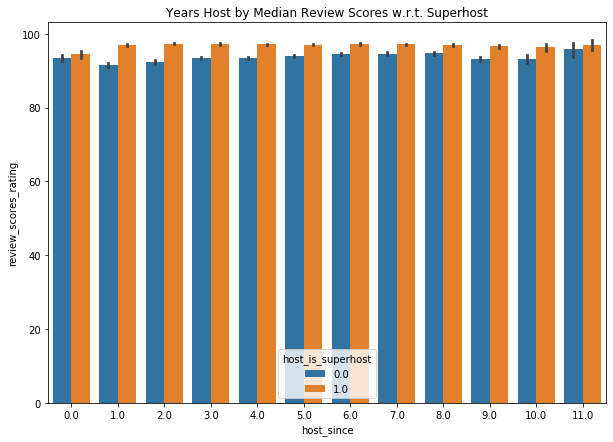

In [333]:
plt.figure(figsize=(10,7))
sns.barplot(x='host_since', y='review_scores_rating', hue='host_is_superhost', data=listings_explore)
plt.title('Years Host by Median Review Scores w.r.t. Superhost')
plt.show()

Superhosts do tend to have slightly higher ratings, but as seen in previous analysis, their benefit comes not from higher median prices but from lower vacancy. Therefore it is possible that guests are not willing to pay more for a superhost's listing, but will choose it over a similarly priced listing by a non-superhost. This choice could either be due to guests preferring superhost status, or the superhost's higher reviews, and is likely a combination of both.

# Multi-Variate Analysis Conclusions

With our new insights, we can now review the questions we set out to answer with this analysis.

**1. Which hosts generate the most revenue?**

Hosts renting from years 1-7 are the largest segments of hosts, with the lowest levels of availability. They generate the most revenue due to their high numbers and low availability. Superhosts generate more revenue than standard hosts due to their even lower availability.

The highest revenue-generating host segment are hosts with high listings counts who have been renting for 1-7 years renting room-type entire house/apartment. A smaller but even more profitable segment are these same hosts that are also superhosts.

The second most profitable segment is hosts and superhosts with high listings counts who have been hosts for 1-7 years renting shared rooms.

**2. Which locations generate the most revenue?**

By borough, Manhattan followed by Brooklyn generate the most revenue with respect to borough due to their high listing counts and low availabilities. More specifically for both boroughs, entire homes/apartments generate the most revenue, followed closely by private rooms. Brooklyn has more listings but Manhattan commands higher prices due to both location and a higher ratio of entire homes/apartments.

West Queens and South Bronx show the most potential for growth due to their high ratios of households to listings, along with their proximity to the city center as population increases. As South Bronx continues gentrifying, median incomes will rise, potentially giving way to new listings with higher prices as tourists become more comfortable with the area. West Queens will continue urbanizing from its suburban roots as population from the city center expands, also giving way to new listings as the borough begins to let go of its suburban roots. Staten Island is our lowest earner, yet there is potential for vacation homes, rather than urban tourist renting, as median incomes are quite high in the borough.

Not surprisingly, most neighborhoods generating the most revenue come from Manhattan and Brooklyn, having the highest frequencies, highest median prices, and lowest availabilities. The highest revenue-generating neighborhoods consist of:

Brooklyn: Downtown Brooklyn, Brooklyn Heights, DUMBO, Bedford-Stuyvesant, Bushwick, Williamsburg.

Manhattan: East Village, West Village, Greenwich Village, Tribeca, Chelsea, Harlem, Upper West Side.

Queens: Astoria, Flushing, Long Island City.


**3. Do listings with higher ratings generate more revenue?**

Listings rated at 90 and above generate more revenue due to higher listing counts, higher median prices, and lower availabilities. Superhosts tend to have slightly higher ratings than standard hosts, and as seen above they have lower availability rates, so based on ratings, Superhosts with ratings above 90 generate the most revenue, followed by non-superhost hosts with ratings above 90.

## Actionable Insights

Consolidating our analysis, our highest revenue-generating listings come from entire homes/apartments and private room listings rated at 90 or above, located primarily in boroughs Brooklyn and Manhattan, along with a few neighborhoods in Queens. More specifically, the highest-revenue neighborhoods are:

Brooklyn: Downtown Brooklyn, Brooklyn Heights, DUMBO, Bedford-Stuyvesant, Bushwick, Williamsburg.

Manhattan: East Village, West Village, Greenwich Village, Tribeca, Chelsea, Harlem, Upper West Side.

Queens: Astoria, Flushing, Long Island City.

The highest revenue-generating hosts of these listings have been hosts from 1-7 years, with superhosts generating slightly more revenue than non-superhosts. Hosts with high listings counts generate even higher listings, naturally, since they are renting multiple listings.

Airbnb's host-marketing efforts should aim towards this demographic of host, in the highest revenue-generating neighborhoods of Brooklyn, Manhattan, and Queens. Marketing promotions in order to keep these hosts loyal would keep these hosts generating the highest revenues. Marketing areas for potential growth campaigns include neighborhoods in West Queens expanding into more urban areas from their suburban roots, and nighborhoods in South Bronx that are gentrifying as median income levels rise from the city's steady population growth.

Guest-marketing efforts should focus in on guests interested in traveling to these areas, using further data from Airbnb customer data or third-party consumer data. With more data, guests can also be segmented by tourist vs. business-travelers in order to aim effectively specialized marketing campaigns at high revenue-generating guests looking to stay in these areas.

# Preparing Training Set for Machine Learning Models

Now that we have finished our analysis, we will begin preparing our training data for our machine learning models. First, we will remove the features with high multicollinearity from our correlation heatmaps to prepare the DataFrame for our machine learning models.

In [334]:
listings_explore.drop(columns=corr_drop, inplace=True)
dropped_cols.extend(corr_drop)

# remove items from attribute lists
for attrib in corr_drop:
    try:
        num_attribs.remove(attrib)
    except ValueError:
        pass
for attrib in corr_drop:
    try:
        disc_attribs.remove(attrib)
    except ValueError:
        pass
for attrib in corr_drop:
    try:
        cat_attribs.remove(attrib)
    except ValueError:
        pass
for attrib in corr_drop:
    try:
        amen_attribs.remove(attrib)
    except ValueError:
        pass

In [335]:
# drop price (label) from num_attribs list
num_attribs.remove('price')

We will now create a function to clean any listings dataframe based on the preprocessing performed above. This way, any new data can be cleansed through this function in the future, including the test set.

In [336]:
# Function to clean dataframe
def clean_listings(df):
    '''
    Cleans listings dataframe to prepare for ML models.
    
    Args:
    df -- uncleaned listings dataframe
    
    Returns:
    clean_df -- cleaned listings dataframe'''
    
    # 1. Price (string mod)
    
    # Remove string characters, convert to float
    df['price'] = df['price'].astype('str')
    df['price'] = df['price'].str.replace('.00', '', regex=False)
    df['price'] = df['price'].str.replace('$', '', regex=False)
    df['price'] = df['price'].str.replace(',', '', regex=False)
    df['price'] = df['price'].astype('float64')

    # 2. number_of_reviews_ltm (cut)

    # Only include number_of_reviews_ltm > 0
    df = df[df.number_of_reviews_ltm > 0]

    # 3. host_since (string mod)

    # Convert to how many years host
    df['host_since'] = 2019 - df['host_since'].str[:4].astype('float64')

    # 4. cleaning_fee (string mod)

    # Remove string characters, convert to float
    df['cleaning_fee'] = df.cleaning_fee.str.replace('$', '', regex=False)
    df['cleaning_fee'] = df.cleaning_fee.str.replace('.00', '', regex=False)
    df['cleaning_fee'] = df.cleaning_fee.str.replace(',', '', regex=False)
    df['cleaning_fee'] = df.cleaning_fee.astype('float64')

    # 5. extra_people (string mod)

    # Remove string characters, convert to float
    df['extra_people'] = df.extra_people.str.replace('$', '', regex=False)
    df['extra_people'] = df.extra_people.str.replace('.00', '', regex=False)
    df['extra_people'] = df.extra_people.str.replace(',', '', regex=False)
    df['extra_people'] = df.extra_people.astype('float64')

    # 6. minimum_nights (cut)

    # only include minimum_nights <= 7
    df = df[df.minimum_nights <= 7].copy(deep=True)

    # 7. maximum_nights (cap)

    # Cap maximum_nights at 1125
    df['maximum_nights'].values[df.maximum_nights > 180] = 180

    # 8. host_is_superhost (convert to 1/0)

    # Convert t/f to 1/0
    df['host_is_superhost'] = convert_tf(df, 'host_is_superhost')

    # 9. host_identity_verified (convert to 1/0) # column is in drop_later actually

    # Convert t/f to 1/0
    #df['host_identity_verified'] = convert_tf(df, 'host_identity_verified')

    # 10. property_type (filter)

    # Filter specific property types
    df = df[
                           (df.property_type == 'Apartment') |
                           (df.property_type == 'House') |
                           (df.property_type == 'Condominium') |
                           (df.property_type == 'Townhouse') |
                           (df.property_type == 'Guest suite') |
                           (df.property_type == 'Guesthouse') |
                           (df.property_type == 'Loft') |
                           (df.property_type == 'Serviced apartment') |
                           (df.property_type == 'Tiny house') |
                           (df.property_type == 'Earth house') |
                           (df.property_type == 'Villa') |
                           (df.property_type == 'Castle') |
                           (df.property_type == 'Cottage') |
                           (df.property_type == 'Dome house')]

    # 11. amenities (cut, string mod)

    # Remove empty values ({})
    df = df[df.amenities != '{}']

    # Remove brackets and quotes, split by ','
    df['amenities'] = df.amenities.astype('str').str.replace('{', '', regex=False).copy()
    df['amenities'] = df.amenities.str.replace('}', '', regex=False).copy()
    df['amenities'] = df.amenities.str.replace('"', '', regex=False).copy()
    df['amenities'] = df.amenities.str.split(',').copy()

    # 12. instant_bookable (convert to 1/0)

    # Convert t/f to 1/0
    df['instant_bookable'] = convert_tf(df, 'instant_bookable')

    # 13. require_guest_profile_picture (convert to 1/0)

    # Convert t/f to 1/0
    df['require_guest_profile_picture'] = convert_tf(df, 'require_guest_profile_picture')
    
    # 14. amenities (multilabelbinarizer)

    # Create columns for each amenity using MultiLabelBinarizer
    from sklearn.preprocessing import MultiLabelBinarizer

    mlb = MultiLabelBinarizer()
    amenities_df = pd.DataFrame(mlb.fit_transform(df.amenities))
    classes = mlb.classes_ # amenity names
    amenities_df.columns = classes # add amenity names as columns

    # Save indices
    indices = np.array(df.index)

    # Merge new amenities columns with original dataframe
    df = pd.concat([df.reset_index(drop=True), amenities_df.reset_index(drop=True)], axis=1)

    # Reapply original indices
    df = df.set_index(indices)

    # Drop 'amenities' column
    df.drop(columns='amenities', inplace=True)

    # Drop unused amenities
    df.drop(columns=dropped_amenities, inplace=True)
    
    #15. LabelEncoder for string-type categories
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in ['neighbourhood_cleansed',
                'neighbourhood_group_cleansed',
                'property_type',
                'room_type',
                'bed_type',
                'cancellation_policy']:
        le.fit(df[col])
        df[col] = le.transform(df[col])
        
    #16. Drop unused features
    df.drop(columns=(dropped_cols+drop_later), inplace=True)
        
    return df

In [337]:
# Clean Training Data
listings_prepared = clean_listings(listings_train)

Remove label feature from training data.

In [338]:
# create y_train from label, drop label from listings_prepared
y_train = listings_prepared['price']
listings_prepared.drop(columns='price', inplace=True)

In [339]:
# Confirm y_train values correct
print(len(y_train))
print(len(listings_prepared))
y_train[0:5]

20403
20403


37753     85.0
3719     285.0
6355     110.0
44513     60.0
37917    999.0
Name: price, dtype: float64

In [340]:
# Compare shape of listings_explore and listings_prepared
print(listings_explore.shape) # +2 cols in drop_later, +1 col is price
print(listings_prepared.shape)

(19232, 65)
(20403, 62)


In [341]:
# Check missing values
sum(listings_prepared.isnull().sum())

3199

## Transformation Pipelines

We will now create transformation Pipelines to scale, missing value impute, and one hot encode the data based on data type, and run it through the training data using ColumnTransformer. These pipelines can later be used to transform the test data as well.

In [342]:
# Create pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', StandardScaler()),
])

disc_pipeline = Pipeline([
    ('disc_imputer', SimpleImputer(strategy='most_frequent')),
    ('disc_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_ohe', OneHotEncoder(categories='auto', drop='first',
                              sparse=False)),
])

amen_pipeline= Pipeline([
    ('amen_imputer', SimpleImputer(strategy='most_frequent')),
])

In [343]:
# Create X_train from ColumnTransformer
from sklearn.compose import ColumnTransformer

listings_prepared_pipeline = listings_prepared.loc[:,listings_prepared.columns]
listings_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('disc', disc_pipeline, disc_attribs),
    ('cat', cat_pipeline, cat_attribs),
    ('amen', amen_pipeline, amen_attribs),
])
X_train = listings_pipeline.fit_transform(listings_prepared_pipeline)

We will also create a separate X_train_trees for tree-based algorithms using only LabelEncoder, not OneHotEncoder for non-binary categories. Tree-based algorithms often perform better on data with less binary columns.

In [344]:
# remove OneHotEncoder from cat_pipeline
cat_pipeline_trees = Pipeline([
    ('cat_imputer_trees', SimpleImputer(strategy='most_frequent')),
])

In [345]:
# X_train_trees
listings_prepared_trees = listings_prepared.loc[:,listings_prepared.columns]
listings_pipeline_trees = ColumnTransformer([
    ('num_trees', num_pipeline, num_attribs),
    ('disc_trees', disc_pipeline, disc_attribs),
    ('cat_trees', cat_pipeline_trees, cat_attribs),
    ('amen_trees', amen_pipeline, amen_attribs),
])
X_train_trees = listings_pipeline_trees.fit_transform(listings_prepared_trees)

In [346]:
# Confirm for no missing values in X_train and X_train_trees
print(sum(pd.DataFrame(X_train).isnull().sum()))
print(sum(pd.DataFrame(X_train_trees).isnull().sum()))

0
0


In [347]:
# Confirm shape
print(X_train_trees.shape)
print(listings_prepared.shape)

(20403, 62)
(20403, 62)


# SelectKBest Feature Importance (Top 10)

Here, we use the SelectKBest method to choose the top 10 most important features. We will then create training data for the top 10 features, and compare our model results with the results of the full training data.

In [348]:
# SelectKBest Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# X_train's column names
X_train_cols = (num_attribs+disc_attribs+cat_attribs+amen_attribs)

# Create X and y
X = pd.DataFrame(X_train_trees, columns=X_train_cols).copy()
y = y_train.copy(deep=True)

# Fit SelectKBest with k=10
best_features = SelectKBest(score_func=f_regression, k=10)
fit = best_features.fit(X,y)

# Create DataFrames for scores and features (columns)
df_fscores = pd.DataFrame(fit.scores_, columns=['f-score'])
df_pvals = pd.DataFrame(fit.pvalues_, columns=['p-value'])
df_columns = pd.DataFrame(X.columns, columns=['Feature'])

# concat two dataframes for better visualization
featureScores = pd.concat([df_columns,df_fscores,df_pvals], axis=1)
featureScores.columns = ['Feature', 'F-score', 'p-value'] # naming the dataframe columns
featureScores.sort_values(by='F-score', ascending=False).head(10)

,Feature,F-score,p-value
2,cleaning_fee,9541.299320,0.000000e+00
6,accommodates,8773.101063,0.000000e+00
8,bedrooms,5219.661845,0.000000e+00
23,room_type,4965.744784,0.000000e+00
9,beds,4521.299800,0.000000e+00
7,bathrooms,2977.115280,0.000000e+00
10,guests_included,2811.301400,0.000000e+00
1,longitude,1140.357715,2.707339e-243
58,TV,740.781600,2.932360e-160
59,Washer,723.988581,9.821901e-157


In [349]:
# Get top 10 features
top_10 = list(featureScores[featureScores['F-score'] >= 637]['Feature'])
top_10

['longitude',
 'cleaning_fee',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'room_type',
 'Dishwasher',
 'TV',
 'Washer']

In [350]:
# Modify attrib lists for Top 10
import collections

# num_attribs_10
num_test = top_10 + num_attribs
num_attribs_10 = []
num_attribs_10.extend([item for item, count in collections.Counter(num_test).items() if count > 1])
print(num_attribs_10)

# disc_attribs_10
disc_test = top_10 + disc_attribs
disc_attribs_10 = []
disc_attribs_10.extend([item for item, count in collections.Counter(disc_test).items() if count > 1])
print(disc_attribs_10)

#cat_attribs_10
cat_test = (top_10 + cat_attribs)
cat_attribs_10 = []
cat_attribs_10.extend([item for item, count in collections.Counter(cat_test).items() if count > 1])
print(cat_attribs_10)

#amen_attribs_10
amen_test = (top_10 + amen_attribs)
amen_attribs_10 = []
amen_attribs_10.extend([item for item, count in collections.Counter(amen_test).items() if count > 1])
print(amen_attribs_10)

['longitude', 'cleaning_fee']
['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included']
['room_type']
['Dishwasher', 'TV', 'Washer']


In [351]:
# Create new pipelines and ColumnTransformer for Top 10

# Create pipelines (X_train)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

num_pipeline_ = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', StandardScaler()),
])

disc_pipeline_ = Pipeline([
    ('disc_imputer', SimpleImputer(strategy='most_frequent')),
    ('disc_scaler', StandardScaler()),
])

cat_pipeline_ = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_ohe_10', OneHotEncoder(categories='auto', drop='first',
                              sparse=False)),
])

amen_pipeline_ = Pipeline([
    ('amen_imputer', SimpleImputer(strategy='most_frequent')),
])

# Create X_train from ColumnTransformer
from sklearn.compose import ColumnTransformer

listings_prepared_pipeline_ = listings_prepared.loc[:,listings_prepared.columns]
listings_pipeline = ColumnTransformer([
    ('num', num_pipeline_, num_attribs_10),
    ('disc', disc_pipeline_, disc_attribs_10),
    ('cat', cat_pipeline_, cat_attribs_10),
    ('amen', amen_pipeline_, amen_attribs_10),
])
X_train_10 = listings_pipeline.fit_transform(listings_prepared_pipeline)

# remove OneHotEncoder from cat_pipeline
cat_pipeline_trees = Pipeline([
    ('cat_imputer_trees', SimpleImputer(strategy='most_frequent')),
])

# X_train_trees_10
listings_prepared_trees_10 = listings_prepared.loc[:,listings_prepared.columns]
listings_pipeline_trees_10 = ColumnTransformer([
    ('num_trees', num_pipeline, num_attribs_10),
    ('disc_trees', disc_pipeline, disc_attribs_10),
    ('cat_trees_10', cat_pipeline_trees, cat_attribs_10),
    ('amen_trees', amen_pipeline, amen_attribs_10),
])
X_train_trees_10 = listings_pipeline_trees_10.fit_transform(listings_prepared_trees_10)

# Machine Learning Algorithms

The scoring metric we will be using for our machine learning algorithms is Mean Absolute Error. This is because the focus of this project is on standard-priced Airbnb's, so MAE will be more resistant to price outliers in our data than RMSE, another common regression scoring metric. In order to further observe the higher price outliers' effect on our scoring metric, we will also compute the Median Absolute Error, which is extremely resistant to outliers, as it only measures the median of the errors.

In [352]:
import warnings
warnings.filterwarnings('ignore')

In [353]:
# Split training set into validation and train sets
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train,
                                                        test_size=0.2, random_state=42)
# Trees data
X_train_trees_val, X_val_trees, y_train_trees_val, y_val_trees = train_test_split(X_train_trees, y_train,
                                                                                test_size=0.2, random_state=42)

To streamline running and cross-validating our models, we will create functions `run_model` and `run_model_cv`. We also create a function called `random_search` for hyperparameter tuning our models.

In [354]:
# Run Model function
def run_model(model, X_train, y_train):
    '''
    Function to run models and output RMSE.
    
    Args:
    model -- model with parameters
    X_train -- X_train
    y_train -- y_train
    
    Return:
    rmse -- root mean squared error
    run_time -- model run time'''
    
    start_time = time.time() # Timing
    
    # Model
    y_pred = model.predict(X_train)
    
    # Metrics
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import r2_score
    
    mae = np.round(mean_absolute_error(y_train, y_pred), 4)
    med_abs_err = np.round(median_absolute_error(y_train, y_pred), 4)
    r2 = np.round(r2_score(y_train, y_pred), 4)
    print('MAE:', mae)
    print('Median Absolute Error:', med_abs_err)
    print('r2:', r2)
    
    # Timing
    run_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))
    
    return mae, r2, run_time

In [355]:
def run_model_cv(model, X_train, y_train, cv=10):
    '''
    Function to run cross_val_score on a model.
    
    Args:
    model -- model with parameters
    X_train -- X_train
    y_train -- y_train
    
    Return:
    cv_scores -- RMSE scores of each k-fold
    run_time'''
    
    start_time = time.time() # Timing
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import r2_score

    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    mae = mean_absolute_error(y_train, y_pred)
    med_abs_err = median_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print('MAE CV:', mae)
    print('Median Absolute Error CV:', med_abs_err)
    print('r2 CV:', r2)
    
    # Timing
    run_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))
    
    return mae, r2

In [357]:
# RandomSearchCV
def random_search(est, params, nbr_iter, X_train, y_train, cv=10):
    start_time = time.time() # Timing
    from sklearn.model_selection import RandomizedSearchCV
    rdmsearch = RandomizedSearchCV(est, param_distributions=params,
                                   scoring='neg_mean_absolute_error',
                                   n_iter=nbr_iter, cv=cv)
    rdmsearch.fit(X_train, y_train)
    best_params = rdmsearch.best_params_
    best_estimator = rdmsearch.best_estimator_
    best_score = -rdmsearch.best_score_
    print('Best MAE:', best_score)
    print(best_params)
    # Timing
    run_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))
    return rdmsearch, best_estimator

In [358]:
# Plot Learning Curves function
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

## Linear Regression

In [359]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Run Model
lin_reg_mae, lin_reg_r2, lin_reg_time = run_model(lin_reg, X_train, y_train)
print()
# Run Model CV
lin_reg_mae_cv, lin_reg_r2_cv = run_model_cv(lin_reg, X_train, y_train)

MAE: 45.0913
Median Absolute Error: 29.9445
r2: 0.5787
Running Time: 0:00:00.011485

MAE CV: 3221852954.439293
Median Absolute Error CV: 30.55355799126238
r2 CV: -1.9064877952380457e+18
Running Time: 0:00:04.028156


In [360]:
# Linear Regression Model Top 10
from sklearn.linear_model import LinearRegression
lin_reg_10 = LinearRegression()
lin_reg_10.fit(X_train_10, y_train)
# Run Model
lin_reg_10_mae, lin_reg_10_r2, lin_reg_10_time = run_model(lin_reg_10, X_train_10, y_train)
print()
# Run Model CV
lin_reg_10_mae_cv, lin_reg_10_r2_cv = run_model_cv(lin_reg_10, X_train_10, y_train)

MAE: 50.7683
Median Absolute Error: 32.6993
r2: 0.4768
Running Time: 0:00:00.003331

MAE CV: 50.83077398305733
Median Absolute Error CV: 32.68179041877107
r2 CV: 0.4740693492020225
Running Time: 0:00:00.112286


Let's try out some polynomial features. We will only run for top 10 due to dimensionality constraints.

In [361]:
# Polynomial Linear Regression Top 10 (deg 2 was 43.0661/43.3208)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_10 = poly_features.fit_transform(X_train_10)
lin_reg_poly_10 = LinearRegression()
lin_reg_poly_10.fit(X_poly_10, y_train)

# Run Model
lin_reg_poly_10_mae, lin_reg_poly_10_r2, lin_reg_poly_10_time = run_model(lin_reg_poly_10, X_poly_10, y_train)
print()
# Run Model CV
lin_reg_poly_10_mae_cv, lin_reg_poly_10_r2_cv = run_model_cv(lin_reg_poly_10, X_poly_10, y_train)

MAE: 42.486
Median Absolute Error: 25.4989
r2: 0.6445
Running Time: 0:00:00.018780

MAE CV: 49.41150232523928
Median Absolute Error CV: 25.87117009116477
r2 CV: -18.797426294075528
Running Time: 0:00:07.111532


Linear Regression performs best with degree=2.

# Stochastic Gradient Descent

In [362]:
# SGD Model
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

# Run Model
sgd_mae, sgd_r2, sgd_time = run_model(sgd, X_train, y_train)
print()
# Run Model CV
sgd_mae_cv, sgd_r2_cv = run_model_cv(sgd, X_train, y_train)

MAE: 44.2065
Median Absolute Error: 29.1227
r2: 0.5702
Running Time: 0:00:00.009127

MAE CV: 45.710496984529655
Median Absolute Error CV: 30.491775439617527
r2 CV: 0.5588404815632613
Running Time: 0:00:06.060492


In [363]:
# SGD Model Top 10
from sklearn.linear_model import SGDRegressor
sgd_10 = SGDRegressor()
sgd_10.fit(X_train_10, y_train)

# Run Model
sgd_10_mae, sgd_10_r2, sgd_10_time = run_model(sgd_10, X_train_10, y_train.ravel())
print()
# Run Model CV
sgd_10_mae_cv, sgd_10_r2_cv = run_model_cv(sgd_10, X_train_10, y_train)

MAE: 51.4686
Median Absolute Error: 33.2963
r2: 0.4746
Running Time: 0:00:00.004604

MAE CV: 51.38379419883242
Median Absolute Error CV: 33.09922145066932
r2 CV: 0.4710355307390143
Running Time: 0:00:00.718790


SGDRegressor looks promising so we will RandomSearchCV.

In [364]:
# aborted due to impractically long training times
'''# RandomSearchCV
sgd_param_grid = {
    max_iter =
        }
sgd_best_params, sgd_best_score = random_search()'''

'# RandomSearchCV\nsgd_param_grid = {\n    max_iter =\n        }\nsgd_best_params, sgd_best_score = random_search()'

SGDRegressor(max_iter=5000, tol=1e-3, penalty='l2',
                       alpha=0.0002, eta0=0.00001,
                       random_state=42)

In [365]:
# Aborted due to impractically long training time
'''# Polynomial SGD Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

# Run Model
sgd_reg_poly = SGDRegressor(max_iter=5000, tol=1e-3, penalty='l2',
                            alpha=0.0002, eta0=0.00001,
                            random_state=42)
sgd_reg_poly.fit(X_poly, y_train)
sgd_reg_poly, sgd_reg_poly_time = run_model(sgd_reg, X_poly, y_train)
print()
sgd_reg_poly_cv = run_model_cv(sgd_reg, X_poly, y_train)'''

"# Polynomial SGD Regression\nfrom sklearn.preprocessing import PolynomialFeatures\npoly_features = PolynomialFeatures(degree=2, include_bias=False)\nX_poly = poly_features.fit_transform(X_train)\n\n# Run Model\nsgd_reg_poly = SGDRegressor(max_iter=5000, tol=1e-3, penalty='l2',\n                            alpha=0.0002, eta0=0.00001,\n                            random_state=42)\nsgd_reg_poly.fit(X_poly, y_train)\nsgd_reg_poly, sgd_reg_poly_time = run_model(sgd_reg, X_poly, y_train)\nprint()\nsgd_reg_poly_cv = run_model_cv(sgd_reg, X_poly, y_train)"

For now, SGDRegressor with full features performs best at RMSE 36 and CV at 37.

# KNN Regressor

Due to long training times, KNN Regressor for all features will be excluded.

In [366]:
'''# KNN Model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

# Run Model
knn_mae, knn_r2, knn_time = run_model(knn, X_train, y_train)
print()
# Run Model CV
knn_mae_cv, knn_r2_cv = run_model_cv(knn, X_train, y_train, cv=5)'''

'# KNN Model\nfrom sklearn.neighbors import KNeighborsRegressor\nknn = KNeighborsRegressor(n_neighbors=2)\nknn.fit(X_train, y_train)\n\n# Run Model\nknn_mae, knn_r2, knn_time = run_model(knn, X_train, y_train)\nprint()\n# Run Model CV\nknn_mae_cv, knn_r2_cv = run_model_cv(knn, X_train, y_train, cv=5)'

In [367]:
# KNN Model Top 10
from sklearn.neighbors import KNeighborsRegressor
knn_10 = KNeighborsRegressor(n_neighbors=4)
knn_10.fit(X_train_10, y_train)

# Run Model
knn_10_mae, knn_10_r2, knn_10_time = run_model(knn_10, X_train_10, y_train)
print()
# Run Model CV
knn_10_mae_cv, knn_10_r2_cv = run_model_cv(knn_10, X_train_10, y_train, cv=5)

MAE: 35.3628
Median Absolute Error: 19.0
r2: 0.7147
Running Time: 0:00:02.322976

MAE CV: 46.36134392001176
Median Absolute Error CV: 25.25
r2 CV: 0.4903402264021055
Running Time: 0:00:03.041027


# Support Vector Machine Regressor

### Linear SVR

In [368]:
# Linear SVR
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(epsilon=0)
lin_svr.fit(X_train, y_train)

# Run Model
lin_svr_mae, lin_svr_r2, lin_svr_time = run_model(lin_svr, X_train, y_train)
print()
# Run Model CV
lin_svr_mae_cv, lin_svr_r2_cv = run_model_cv(lin_svr, X_train, y_train)

MAE: 40.0292
Median Absolute Error: 21.5126
r2: 0.4896
Running Time: 0:00:00.010501

MAE CV: 40.37523199717028
Median Absolute Error CV: 21.811172492213416
r2 CV: 0.48796940198881666
Running Time: 0:00:02.456768


In [369]:
# Linear SVR Top 10
from sklearn.svm import LinearSVR
lin_svr_10 = LinearSVR(epsilon=0)
lin_svr_10.fit(X_train_10, y_train)

# Run Model
lin_svr_10_mae, lin_svr_10_r2, lin_svr_10_time = run_model(lin_svr_10, X_train_10, y_train)
print()
# Run Model CV
lin_svr_10_mae_cv, lin_svr_10_r2_cv = run_model_cv(lin_svr_10, X_train_10, y_train)

MAE: 47.0792
Median Absolute Error: 26.8822
r2: 0.41
Running Time: 0:00:00.004180

MAE CV: 47.12461322406082
Median Absolute Error CV: 27.020101080057657
r2 CV: 0.41202459701593686
Running Time: 0:00:00.660306


### SVR Poly Kernel

In [370]:
# SVR Poly Kernel Top 10
from sklearn.svm import SVR
svr_poly_10 = SVR(kernel='poly', degree=2, C=100, epsilon=1, gamma='auto_deprecated')
svr_poly_10.fit(X_train_10, y_train)

# Run Model
svr_poly_10_mae, svr_poly_10_r2, svr_poly_10_time = run_model(svr_poly_10, X_train_10, y_train)
print()
# Run Model CV
#svr_poly_10_mae_cv, svr_poly_10_r2_cv = run_model_cv(svr_poly_10, X_train_10, y_train)

MAE: 44.6577
Median Absolute Error: 25.3078
r2: 0.5111
Running Time: 0:00:05.333765



# Decision Tree Regressor

In [371]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5,
                                 random_state=42)
tree_reg.fit(X_train_trees, y_train)

# Run Model
tree_reg_mae, tree_reg_r2, tree_reg_time = run_model(tree_reg, X_train_trees, y_train)
print()
# Run Model CV
tree_reg_mae_cv, tree_reg_r2_cv = run_model_cv(tree_reg, X_train_trees, y_train)

MAE: 44.1348
Median Absolute Error: 25.2717
r2: 0.6032
Running Time: 0:00:00.006759

MAE CV: 46.193681024503796
Median Absolute Error CV: 25.444231506324257
r2 CV: 0.4300736419495228
Running Time: 0:00:01.156009


In [372]:
# Decision Tree Regressor Top 10
from sklearn.tree import DecisionTreeRegressor

tree_reg_10 = DecisionTreeRegressor(max_depth=9,
                                 random_state=42)
tree_reg_10.fit(X_train_trees_10, y_train)

# Run Model
tree_reg_10_mae, tree_reg_10_r2, tree_reg_10_time = run_model(tree_reg_10, X_train_trees_10, y_train)
print()
# Run Model CV
tree_reg_10_mae_cv, tree_reg_10_r2_cv = run_model_cv(tree_reg_10, X_train_trees_10, y_train)

MAE: 38.7866
Median Absolute Error: 22.8097
r2: 0.7091
Running Time: 0:00:00.003975

MAE CV: 44.24460581805719
Median Absolute Error CV: 24.076233183856502
r2 CV: 0.46244982808806834
Running Time: 0:00:00.403822


# Random Forest Regressor

In [373]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=4, n_estimators=100,
                               random_state=42)
forest.fit(X_train_trees, y_train)

# Run Model
forest_mae, forest_r2, forest_time = run_model(forest, X_train_trees, y_train)
print()
# Run Model CV
forest_mae_cv, forest_r2_cv = run_model_cv(forest, X_train_trees, y_train)

MAE: 45.7534
Median Absolute Error: 26.2442
r2: 0.5571
Running Time: 0:00:00.064205

MAE CV: 46.68298403983314
Median Absolute Error CV: 26.736221312026004
r2 CV: 0.46861793023303966
Running Time: 0:00:53.356790


Now we will perform RandomSearchCV to tune Random Forest's hyperparameters.

In [374]:
# Commented out to save notebook runtime (4 mins)
'''# Forest RandomSearchCV
from scipy.stats import randint

forest_rds = RandomForestRegressor(random_state=42)

forest_param_grid = {
    'max_depth':[1,2,3,7,10,None],
    'n_estimators':[100,200,300,400,500,'warn'],
    'max_features':randint(1,3),
    'bootstrap':[True,False],
    'min_samples_leaf':randint(1,4),
    }
forest_best_params, forest_best = random_search(forest, forest_param_grid,
                                        40, X_train_trees, y_train,
                                        cv=5)'''

Best MAE: 40.77702254024558
{'bootstrap': False, 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
Running Time: 0:04:29.097265


In [375]:
#forest_best

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [376]:
forest_best = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

"forest_best = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,\n                      max_features=2, max_leaf_nodes=None,\n                      min_impurity_decrease=0.0, min_impurity_split=None,\n                      min_samples_leaf=2, min_samples_split=2,\n                      min_weight_fraction_leaf=0.0, n_estimators=200,\n                      n_jobs=None, oob_score=False, random_state=42, verbose=0,\n                      warm_start=False)"

We will now run our best Random Forest hyperparameters model.

In [377]:
# Fit model
forest_best.fit(X_train_trees, y_train)
# Run Model
forest_mae, forest_r2, forest_time = run_model(forest_best, X_train_trees, y_train)
print()
# Run Model CV
forest_mae_cv, forest_r2_cv = run_model_cv(forest_best, X_train_trees, y_train)

MAE: 24.0712
Median Absolute Error: 15.6753
r2: 0.8481
Running Time: 0:00:01.231722

MAE CV: 40.39563570133131
Median Absolute Error CV: 25.803401945251125
r2 CV: 0.5621075636276367
Running Time: 0:00:41.048329


#### Feature importances:

In [378]:
# Feature importances
sorted(zip(forest_best.feature_importances_, (num_attribs+disc_attribs+cat_attribs+amen_attribs)), reverse=True)

[(0.09334435024100804, 'cleaning_fee'),
 (0.09264256996727599, 'accommodates'),
 (0.08315689133551311, 'bedrooms'),
 (0.06758573865656298, 'room_type'),
 (0.057686481621350975, 'longitude'),
 (0.05747863450978212, 'bathrooms'),
 (0.0501808590192215, 'beds'),
 (0.03906849616076958, 'guests_included'),
 (0.0337163208355383, 'latitude'),
 (0.02851913675845088, 'availability_365'),
 (0.023984725238641758, 'extra_people'),
 (0.021664172481585902, 'neighbourhood_cleansed'),
 (0.02148544563039594, 'reviews_per_month'),
 (0.02124894720651727, 'availability_30'),
 (0.01974526953863809, 'neighbourhood_group_cleansed'),
 (0.017381471478580927, 'number_of_reviews'),
 (0.016585317600977947, 'property_type'),
 (0.015798909329163283, 'review_scores_rating'),
 (0.015288493524943374, 'host_since'),
 (0.014581993283486562, 'Washer'),
 (0.01387541539472656, 'minimum_nights'),
 (0.013068744577288247, 'review_scores_location'),
 (0.012778872080131102, 'Elevator'),
 (0.01197644064969143, 'Dishwasher'),
 (0.

In [379]:
# Random Forest Regressor Top 10
from sklearn.ensemble import RandomForestRegressor

forest_10 = RandomForestRegressor(max_depth=4, n_estimators=100,
                               random_state=42)
forest_10.fit(X_train_trees_10, y_train)
# Run Model
forest_10_mae, forest_10_r2, forest_10_time = run_model(forest_10, X_train_trees_10, y_train)
print()
# Run Model CV
forest_10_mae_cv, forest_10_r2_cv = run_model_cv(forest_10, X_train_trees_10, y_train)

MAE: 46.69
Median Absolute Error: 27.0597
r2: 0.5462
Running Time: 0:00:00.062625

MAE CV: 47.47586942531531
Median Absolute Error CV: 27.251380603653608
r2 CV: 0.45951199266809917
Running Time: 0:00:11.994779


# AdaBoost Regressor

In [380]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5,
                                random_state=42),
                                n_estimators=200,
                                loss='linear', random_state=42)
ada_reg.fit(X_train_trees, y_train)

# Run Model
ada_reg_mae, ada_reg_r2, ada_reg_time = run_model(ada_reg, X_train_trees, y_train)
print()
# Run Model CV
ada_reg_mae_cv, ada_reg_r2_cv = run_model_cv(ada_reg, X_train_trees, y_train)

MAE: 180.8504
Median Absolute Error: 183.9341
r2: -1.0922
Running Time: 0:00:01.806414

MAE CV: 173.18514731745026
Median Absolute Error CV: 170.05909855994014
r2 CV: -1.0982046215507353
Running Time: 0:03:36.994706


In [381]:
# Adaboost Top 10
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg_10 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=9,
                                random_state=42),
                                n_estimators=200,
                                loss='linear', random_state=42)
ada_reg_10.fit(X_train_trees_10, y_train)

# Run Model
ada_reg_10_mae, ada_reg_10_r2, ada_reg_10_time = run_model(ada_reg_10, X_train_trees_10, y_train)
print()
# Run Model CV
ada_reg_10_mae_cv, ada_reg_10_r2_cv = run_model_cv(ada_reg_10, X_train_trees_10, y_train)

MAE: 56.5167
Median Absolute Error: 49.5316
r2: 0.727
Running Time: 0:00:00.885313

MAE CV: 60.99118322550187
Median Absolute Error CV: 47.50617283950618
r2 CV: 0.43235820496465505
Running Time: 0:00:59.736919


# XGBoost Regressor

In [382]:
# XGB
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=5, objective='reg:squarederror',
                           random_state=42)
xgb.fit(X_train_trees, y_train)

# Run Model
xgb_mae, xgb_r2, xgb_time = run_model(xgb, X_train_trees, y_train)
print()
# Run Model CV
xgb_mae_cv, xgb_r2_cv = run_model_cv(xgb, X_train_trees, y_train)

MAE: 29.8062
Median Absolute Error: 18.1323
r2: 0.8433
Running Time: 0:00:00.140261

MAE CV: 34.8967298323434
Median Absolute Error CV: 19.03516387939453
r2 CV: 0.6700783866606518
Running Time: 0:01:40.023346


In [383]:
# XGB Top 10
from xgboost import XGBRegressor
xgb_10 = XGBRegressor(max_depth=5, objective='reg:squarederror',
                           random_state=42)
xgb_10.fit(X_train_trees_10, y_train)

# Run Model
xgb_10_mae, xgb_10_r2, xgb_10_time = run_model(xgb_10, X_train_trees_10, y_train)
print()
# Run Model CV
xgb_10_mae_cv, xgb_10_r2_cv = run_model_cv(xgb_10, X_train_trees_10, y_train)

MAE: 37.7678
Median Absolute Error: 22.8996
r2: 0.7261
Running Time: 0:00:00.083888

MAE CV: 41.1441649474017
Median Absolute Error CV: 23.353939056396484
r2 CV: 0.5768827857002228
Running Time: 0:00:23.184732


In [384]:
# Commented out to save notebook runtime (1hr 7mins)
'''# XGB RandomSearchCV
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_param_grid = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
}
xgb_rdsearch, xgb_best = random_search(xgb,
                                        xgb_param_grid,
                                        100,
                                        X_train_trees, y_train,
                                        cv=5)'''

Best MAE: 33.91192250905455
{'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.5}
Running Time: 1:07:06.685331


In [385]:
#xgb_best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [386]:
xgb_best = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

"xgb_best = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,\n             importance_type='gain', learning_rate=0.05, max_delta_step=0,\n             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,\n             n_jobs=1, nthread=None, objective='reg:squarederror',\n             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,\n             seed=None, silent=None, subsample=1, verbosity=1)"

In [387]:
# Fit model
xgb_best.fit(X_train_trees, y_train)
# Run model
xgb_mae, xgb_r2, xgb_time = run_model(xgb_best, X_train_trees, y_train)
print()
# Run model CV
xgb_mae_cv, xgb_r2_cv = run_model_cv(xgb_best, X_train_trees, y_train)

MAE: 13.3367
Median Absolute Error: 8.7661
r2: 0.9757
Running Time: 0:00:00.686719

MAE CV: 33.669259267619196
Median Absolute Error CV: 18.6845703125
r2 CV: 0.6702345873192708
Running Time: 0:02:19.479562


In [388]:
# Commented out to save notebook runtime (14 mins)
'''# XGB RandomSearchCV Top 10
xgb_10 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_param_grid_10 = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
}
xgb_10_rdsearch, xgb_10_best = random_search(xgb_10,
                                                xgb_param_grid_10,
                                                100,
                                                X_train_trees_10, y_train,
                                                cv=5)'''

Best MAE: 40.606537479048576
{'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
Running Time: 0:14:23.411425


In [389]:
#xgb_10_best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [390]:
xgb_10_best = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

"xgb_10_best = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,\n             importance_type='gain', learning_rate=0.05, max_delta_step=0,\n             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,\n             n_jobs=1, nthread=None, objective='reg:squarederror',\n             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,\n             seed=None, silent=None, subsample=1, verbosity=1)"

In [391]:
xgb_10_best.fit(X_train_trees_10, y_train)
# Run model top 10
xgb_10_mae, xgb_10_r2, xgb_10_time = run_model(xgb_10_best, X_train_trees_10, y_train)
print()
# Run model CV
xgb_10_mae_cv, xgb_10_r2_cv = run_model_cv(xgb_10_best, X_train_trees_10, y_train)

MAE: 34.52
Median Absolute Error: 21.7418
r2: 0.7898
Running Time: 0:00:00.187792

MAE CV: 40.47340403517888
Median Absolute Error CV: 23.04698944091797
r2 CV: 0.5914558807439014
Running Time: 0:00:27.924985


# Model Performance Metrics
Here we've created a DataFrame of our models' performances on the training data.

In [392]:
# DataFrame of model mae scores
model_scores = pd.DataFrame({
    'Model': ['Linear Regression',
             'Linear Regression 10',
             'Polynomial Linear Regression 10',
             'SGD',
             'SGD 10',
             #'KNN',
             'KNN 10',
             'Linear SVR',
             'Linear SVR 10',
             #'Linear SVR Poly 10',
             'Decision Tree',
             'Decision Tree 10',
             'Random Forest',
             'AdaBoost',
             'AdaBoost 10',
             'XGBoost',
             'XGBoost 10'],
    'MAE CV': [np.round(lin_reg_mae_cv,2),
            np.round(lin_reg_10_mae_cv,2),
            np.round(lin_reg_poly_10_mae_cv,2),
            np.round(sgd_mae_cv,2),
            np.round(sgd_10_mae_cv,2),
            #np.round(knn_mae_cv,2),
            np.round(knn_10_mae_cv,2),
            np.round(lin_svr_mae_cv,2),
            np.round(lin_svr_10_mae_cv,2),
            #np.round(svr_poly_10_mae_cv,2),
            np.round(tree_reg_mae_cv,2),
            np.round(tree_reg_10_mae_cv,2),
            np.round(forest_mae_cv,2),
            np.round(ada_reg_mae_cv,2),
            np.round(ada_reg_10_mae_cv,2),
            np.round(xgb_mae_cv,2),
            np.round(xgb_10_mae_cv,2)],
    'R2 CV': [np.round(lin_reg_r2_cv,2),
            np.round(lin_reg_10_r2_cv,2),
            np.round(lin_reg_poly_10_r2_cv,2),
            np.round(sgd_r2_cv,2),
            np.round(sgd_10_r2_cv,2),
            #np.round(knn_r2_cv,2),
            np.round(knn_10_r2_cv,2),
            np.round(lin_svr_r2_cv,2),
            np.round(lin_svr_10_r2_cv,2),
            #np.round(svr_poly_10_r2_cv,2),
            np.round(tree_reg_r2_cv,2),
            np.round(tree_reg_10_r2_cv,2),
            np.round(forest_r2_cv,2),
            np.round(ada_reg_r2_cv,2),
            np.round(ada_reg_10_r2_cv,2),
            np.round(xgb_r2_cv,2),
            np.round(xgb_10_r2_cv,2)],
    'Runtime':[lin_reg_time,
            lin_reg_10_time,
            lin_reg_poly_10_time,
            sgd_time,
            sgd_10_time,
            #knn_time,
            knn_10_time,
            lin_svr_time,
            lin_svr_10_time,
            #svr_poly_10_time,
            tree_reg_time,
            tree_reg_10_time,
            forest_time,
            ada_reg_time,
            ada_reg_10_time,
            xgb_time,
            xgb_10_time]
})

In [393]:
model_scores.sort_values('MAE CV')

,Model,MAE CV,R2 CV,Runtime
13,XGBoost,3.367000e+01,6.700000e-01,0.686719
6,Linear SVR,4.038000e+01,4.900000e-01,0.010501
10,Random Forest,4.040000e+01,5.600000e-01,1.231722
14,XGBoost 10,4.047000e+01,5.900000e-01,0.187792
9,Decision Tree 10,4.424000e+01,4.600000e-01,0.003975
3,SGD,4.571000e+01,5.600000e-01,0.009127
8,Decision Tree,4.619000e+01,4.300000e-01,0.006759
5,KNN 10,4.636000e+01,4.900000e-01,2.322976
7,Linear SVR 10,4.712000e+01,4.100000e-01,0.004180
2,Polynomial Linear Regression 10,4.941000e+01,-1.880000e+01,0.018780


We can see that our best model is the XGBoost Regressor with an RMSE of 33.67 and an r2 of 0.67 in 0.69 seconds. Due to its lowest MAE and time efficiency, XGBoost is our final model of choice for the test set.

# Evaluate Model on the Test Set

In [394]:
# Create test set
listings_test_prepared = clean_listings(listings_test)
y_test = listings_test_prepared['price']
listings_test_prepared.drop(columns='price', inplace=True)
X_test_trees = listings_pipeline_trees.transform(listings_test_prepared.loc[:, listings_test_prepared.columns])

In [395]:
# Confirm no missing values in X_test_trees
print(sum(pd.DataFrame(X_test_trees).isnull().sum()))
# Confirm X_test_trees shape
print(X_test_trees.shape)
# Confirm y_test_trees shape
y_test.shape

0
(5157, 62)


(5157,)

In [396]:
# Fit model
xgb_best.fit(X_train_trees, y_train)
# Run model
final_mae, final_r2, final_time = run_model(xgb_best, X_test_trees, y_test)

MAE: 33.2258
Median Absolute Error: 17.8695
r2: 0.6181
Running Time: 0:00:00.189696


# Conclusion

Our model can now predict the price of any Airbnb listing in NYC with an MAE of 33.23, Median Absolute Error of 17.87, and an r2 of 0.62 in 0.19 seconds. Along with segmenting and targetting the highest revenue-generating hosts in our multi-variate analysis above, Airbnb can utilize this predictor in-app to provide hosts with an estimate of their listing's price. This will not only streamline the listing process for hosts, but also ensure hosts are not pricing their listings too low (sacrificing potential revenue), or too high (losing potential guest purchases).

Moving forward, analysis on data containing guest behavior and preferences can provide another layer of segmentation and insight into the most profitable Airbnb listings. Guest-marketing efforts should focus in on guests interested in traveling to these areas, using further data from Airbnb customer data or third-party consumer data.

With more data, guests can also be segmented by tourist vs. business-travelers in order to aim effectively specialized marketing campaigns at high revenue-generating guests looking to stay in these areas.

Time series data can also provide deep insights into trends in order to target high growth areas that may not be as visible from static price and availability data.